In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm


import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\train.csv')

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
#Checking for presence of any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df['Alley'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Alley, dtype: object

In [7]:
#Replacing all the NA with their right set of values.
df['Alley']=df['Alley'].fillna("No alley access")
df['BsmtQual']=df['BsmtQual'].fillna("No Basement")
df['BsmtCond']=df['BsmtCond'].fillna("No Basement")
df['BsmtExposure']=df['BsmtExposure'].fillna("No Basement")
df['BsmtFinType1']=df['BsmtFinType1'].fillna("No Basement")
df['BsmtFinType2']=df['BsmtFinType2'].fillna("No Basement")
df['FireplaceQu']=df['FireplaceQu'].fillna("No Fireplace")
df['GarageType']=df['GarageType'].fillna("No Garage")
df['GarageFinish']=df['GarageFinish'].fillna("No Garage")
df['GarageQual']=df['GarageQual'].fillna("No Garage")
df['GarageCond']=df['GarageCond'].fillna("No Garage")
df['PoolQC']=df['PoolQC'].fillna("No Pool")
df['Fence']=df['Fence'].fillna("No Fence")

In [8]:
#Dropping columns which have more than 40% missing values
df=df.dropna(thresh=0.4*df.shape[0],axis=1)

In [9]:
containnull=[]
for col in df.columns:
    if df[col].isnull().sum()!=0:
        containnull.append(col)
    

In [10]:
containnull

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt']

In [11]:
df[containnull].isnull().sum()

LotFrontage    259
MasVnrType     872
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [12]:
df['Electrical']

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [13]:
df['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [14]:
df['Electrical']=df['Electrical'].fillna('SBrkr')
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
#dropping MasVnrType due to the number of None or null values 

In [15]:
#Identifying unique values across all columns
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 80, dtype: int64

In [16]:
df.shape

(1460, 80)

In [17]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0   1          60       RL         65.0     8450   Pave  No alley access   
1   2          20       RL         80.0     9600   Pave  No alley access   
2   3          60       RL         68.0    11250   Pave  No alley access   
3   4          70       RL         60.0     9550   Pave  No alley access   
4   5          60       RL         84.0    14260   Pave  No alley access   

  LotShape LandContour Utilities  ... ScreenPorch PoolArea   PoolQC     Fence  \
0      Reg         Lvl    AllPub  ...           0        0  No Pool  No Fence   
1      Reg         Lvl    AllPub  ...           0        0  No Pool  No Fence   
2      IR1         Lvl    AllPub  ...           0        0  No Pool  No Fence   
3      IR1         Lvl    AllPub  ...           0        0  No Pool  No Fence   
4      IR1         Lvl    AllPub  ...           0        0  No Pool  No Fence   

  MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0       0      2   2008        WD         Normal     208500  
1       0      5   2007        WD         Normal     181500  
2       0      9   2008        WD         Normal     223500  
3       0      2   2006        WD        Abnorml     140000  
4       0     12   2008        WD         Normal     250000  

[5 rows x 80 columns]

In [18]:
#building a list of categorical variables.
catvar=['MSSubClass','MSZoning','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition','Street','CentralAir']

#The following are not binary variables
dummycatvar=['MSSubClass','MSZoning','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']


In [19]:
#Dropping id since it doesn't add any extra details to our system its just a serial number.MasVnrType due to lot of None values.
df=df.drop('Id',axis=1)
df=df.drop('MasVnrType',axis=1)

In [20]:
columns=df.columns

In [21]:
columns1=np.array(columns).reshape(-1)
catvar1=np.array(catvar).reshape(-1)
result=np.setdiff1d(columns1, catvar1)

In [22]:
catvar1

array(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Street',
       'CentralAir'], dtype='<U13')

In [23]:
result

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'], dtype=object)

In [24]:
#building a list of categorical variables.
catvar=['MSSubClass','MSZoning','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition','Street','CentralAir']

#Here yr,holiday,workingday are binary variables
dummycatvar=['MSSubClass','MSZoning','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']


In [25]:
#list of numerical columns
numvar=result.tolist()

In [26]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Op

In [27]:
print(len(catvar))
print(len(numvar))

44
35


In [28]:
df.shape

(1460, 78)

In [29]:
numvar.remove('SalePrice')

In [30]:
catvar

['MSSubClass',
 'MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'Street',
 'CentralAir']

In [31]:
df['Alley']

0       No alley access
1       No alley access
2       No alley access
3       No alley access
4       No alley access
             ...       
1455    No alley access
1456    No alley access
1457    No alley access
1458    No alley access
1459    No alley access
Name: Alley, Length: 1460, dtype: object

In [32]:
#creating a target variable
target=['SalePrice']

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Univariate Analysis

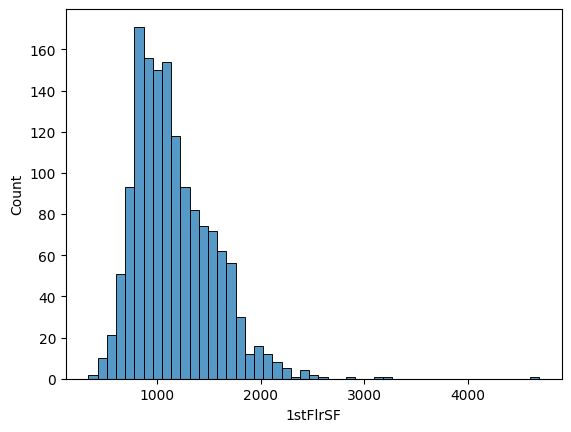

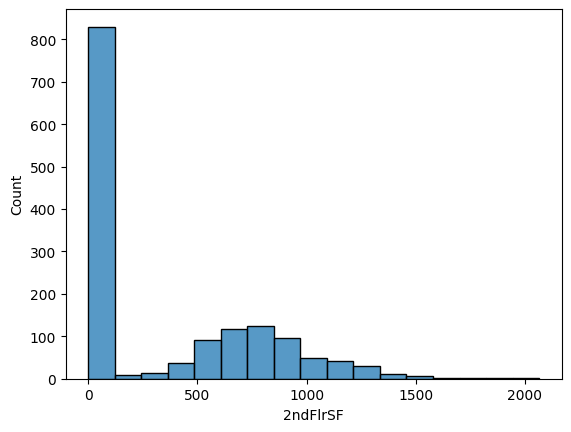

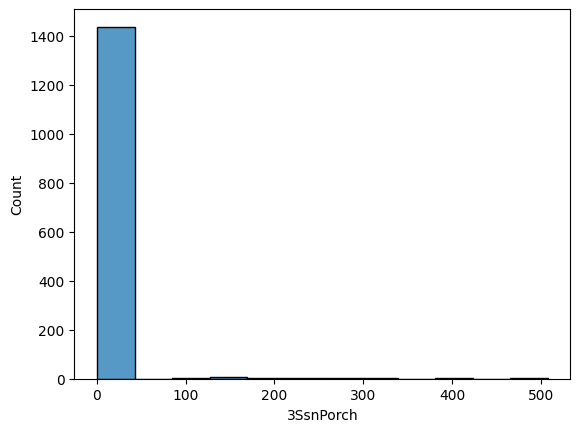

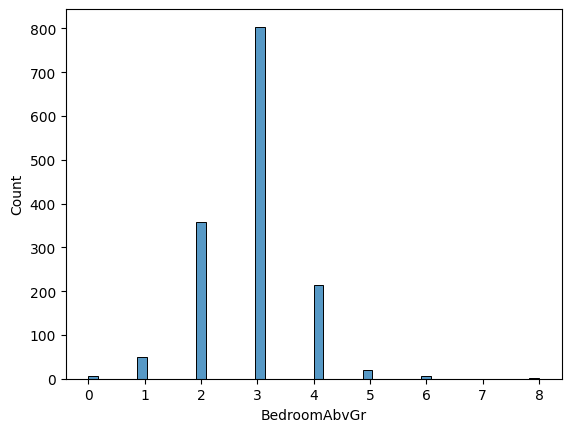

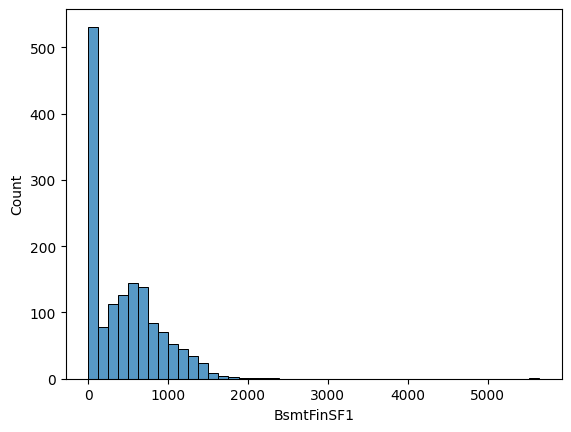

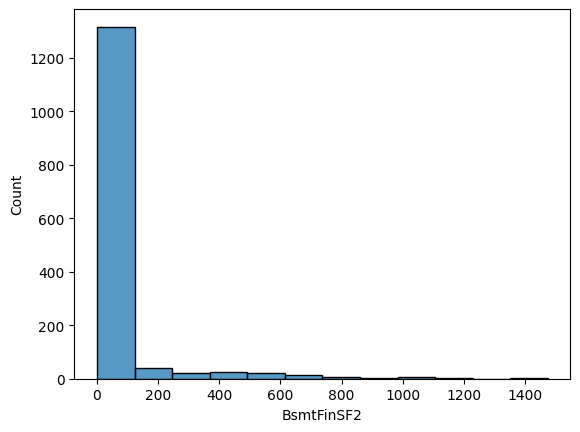

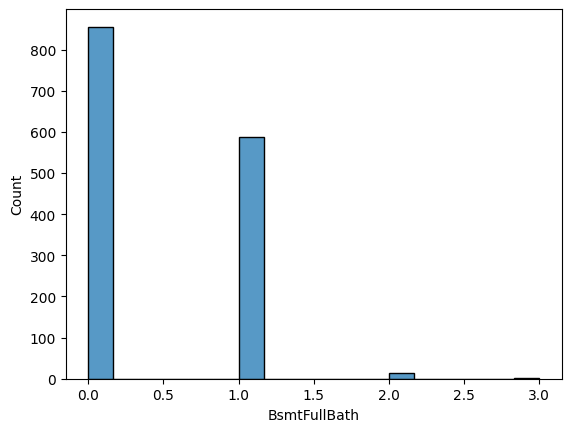

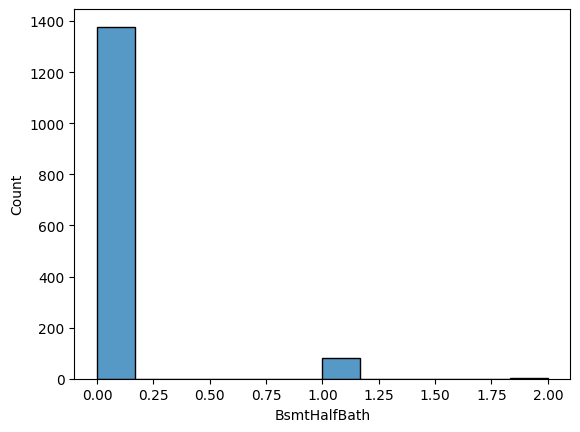

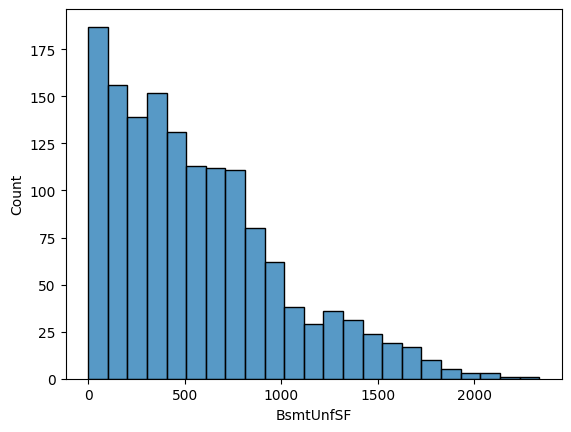

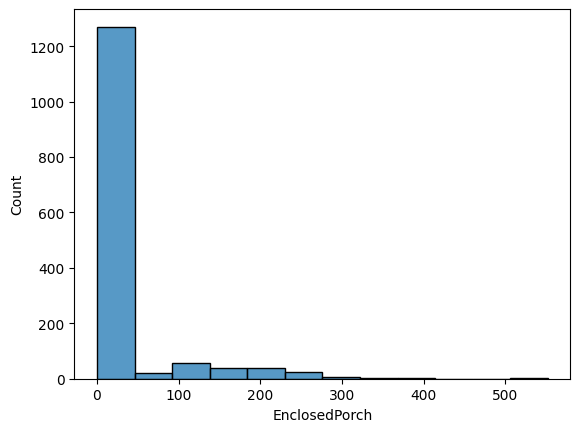

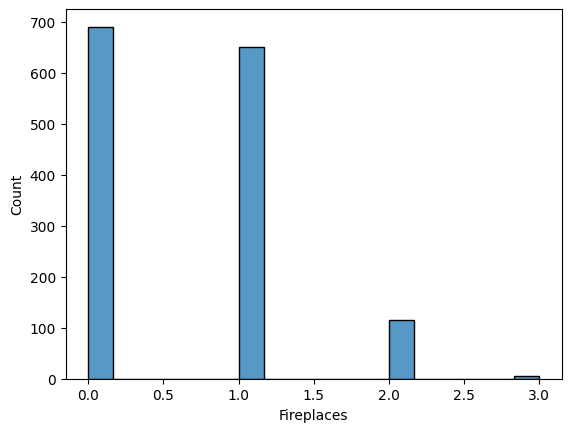

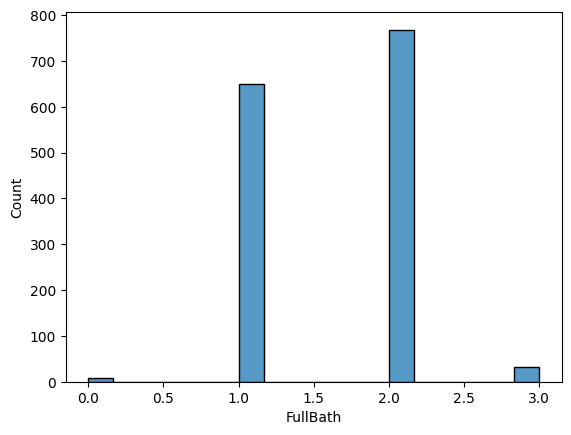

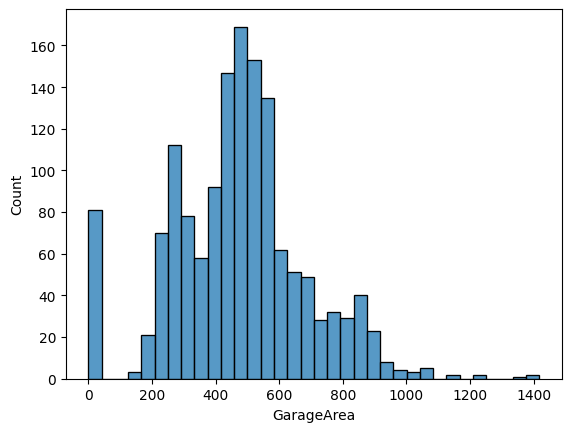

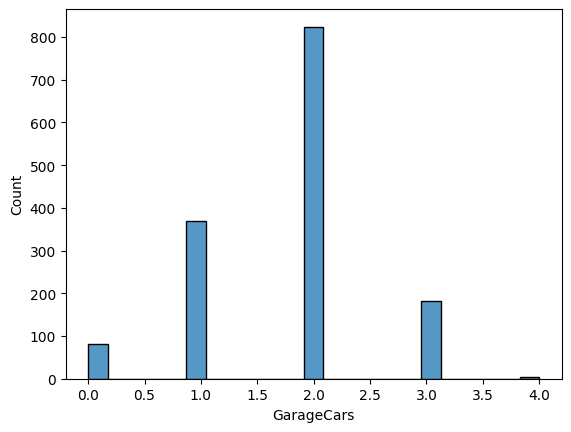

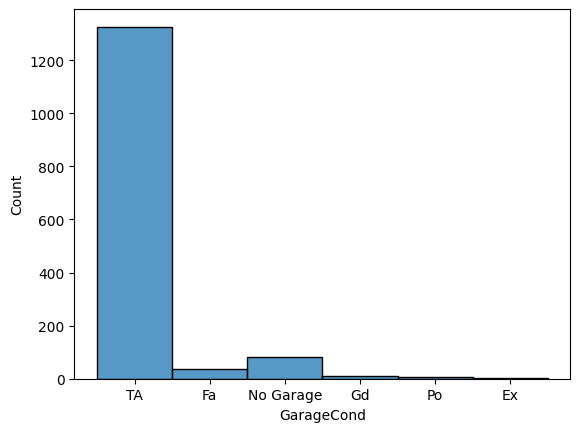

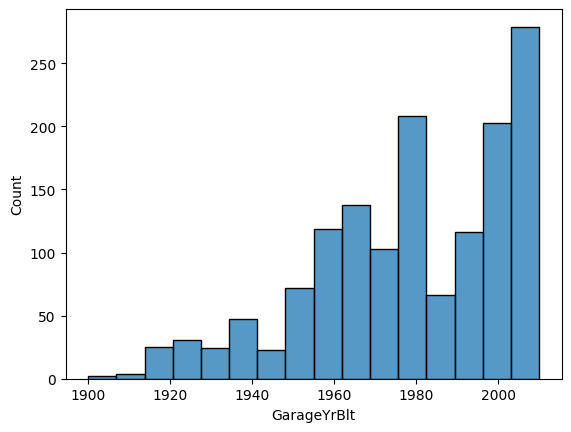

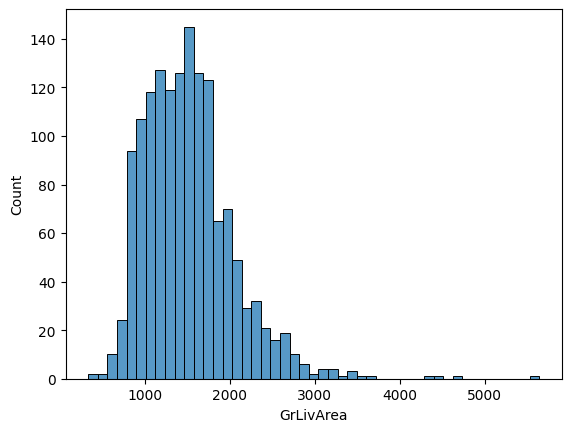

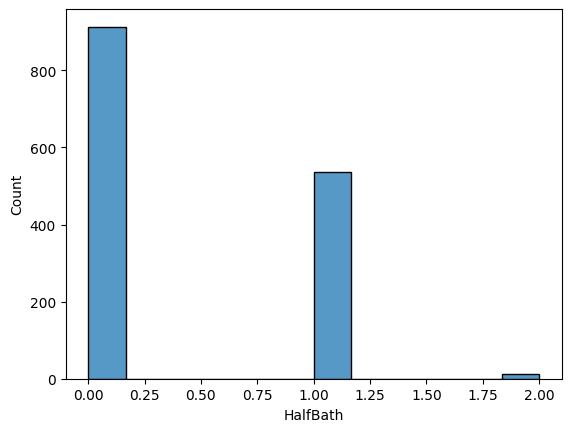

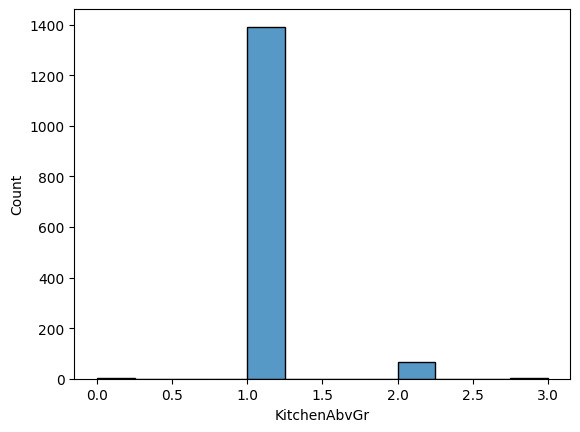

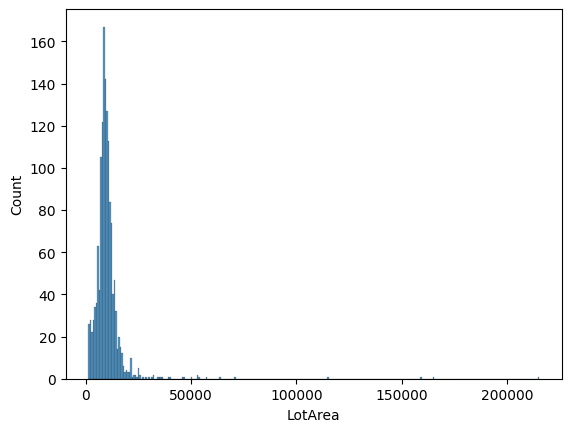

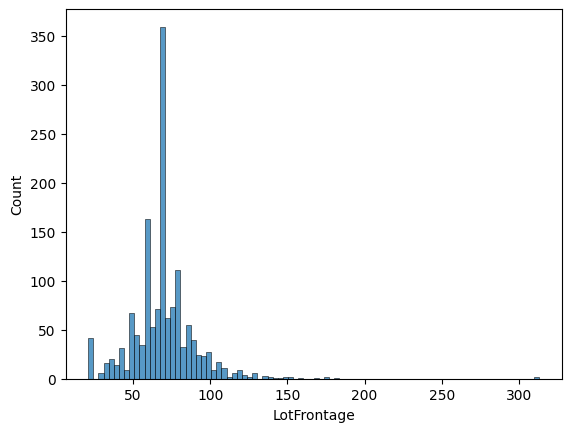

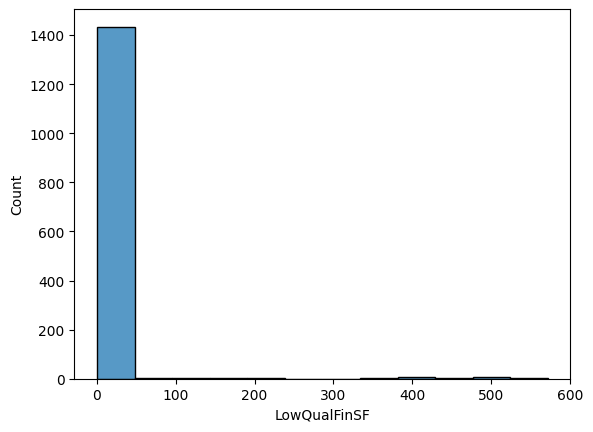

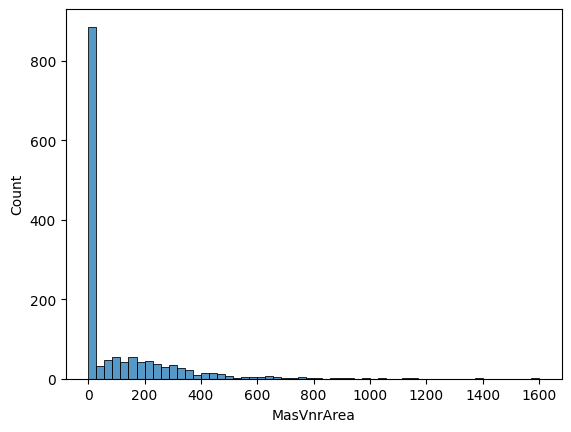

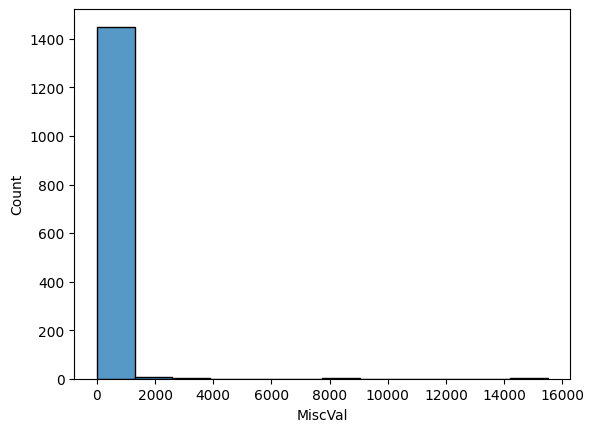

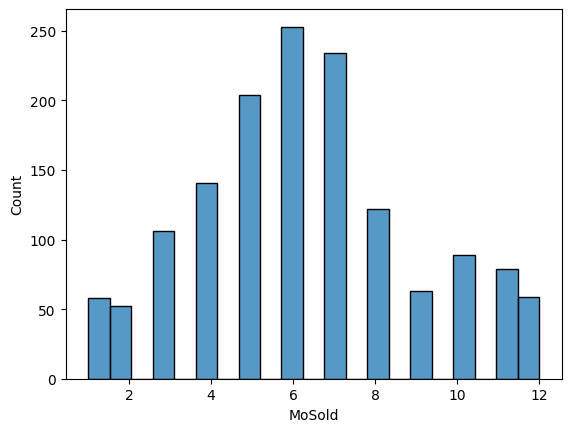

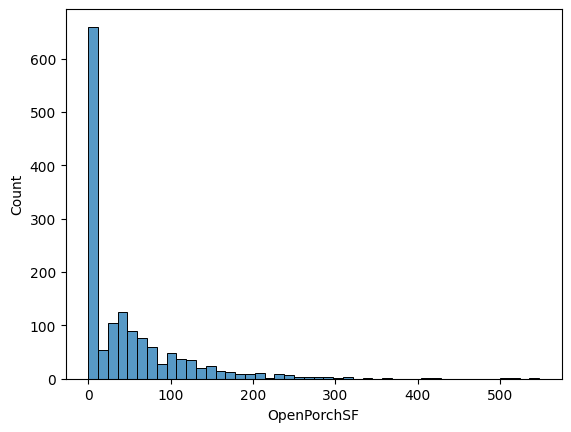

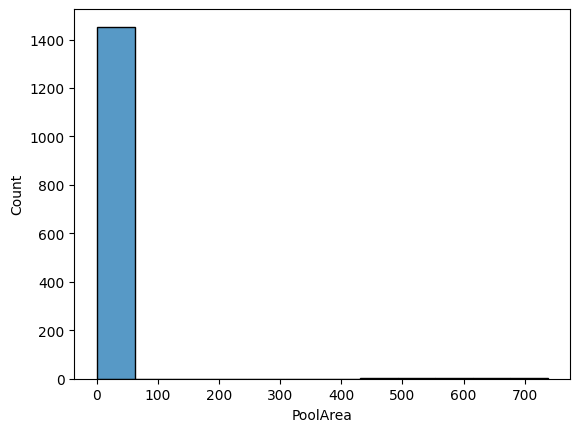

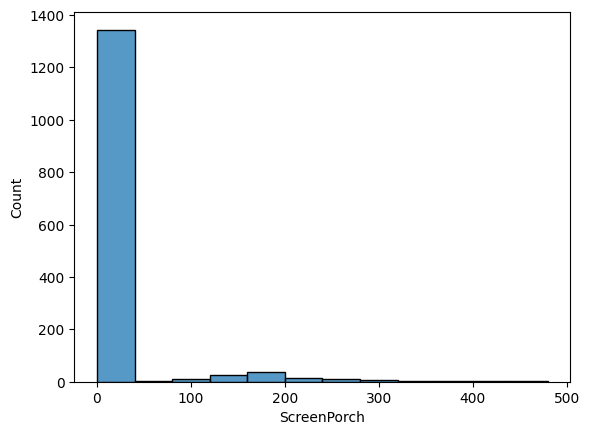

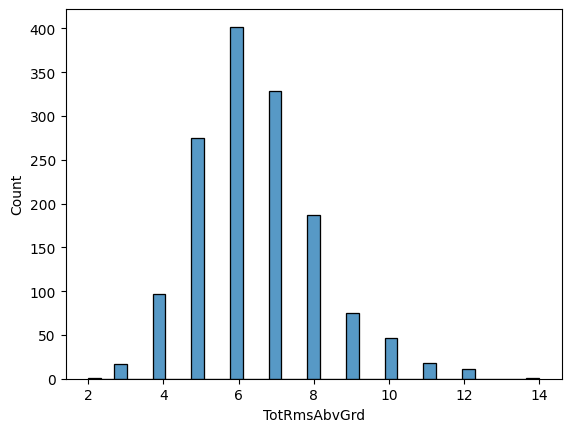

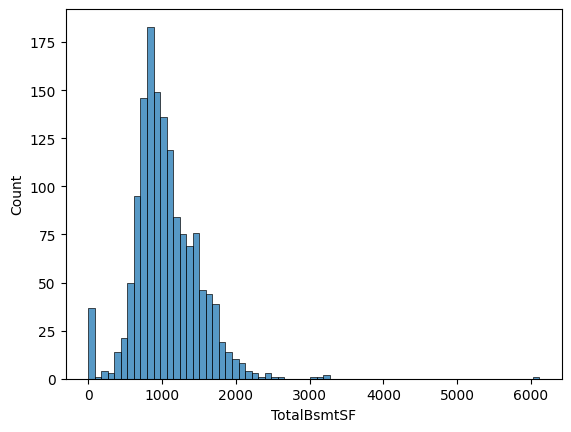

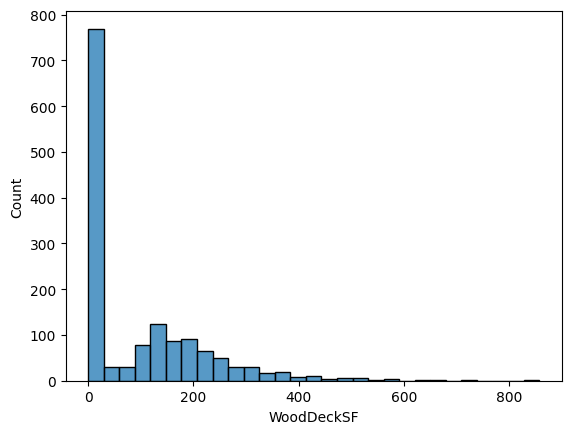

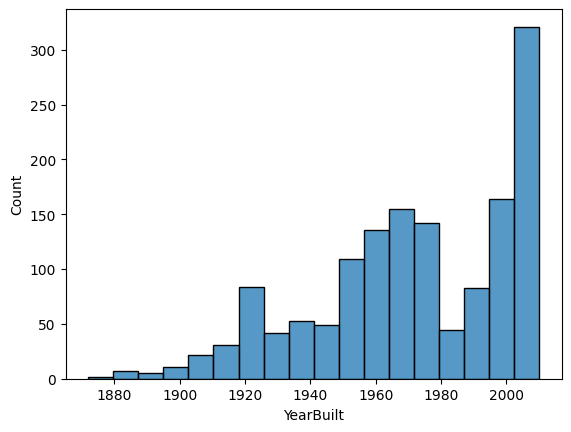

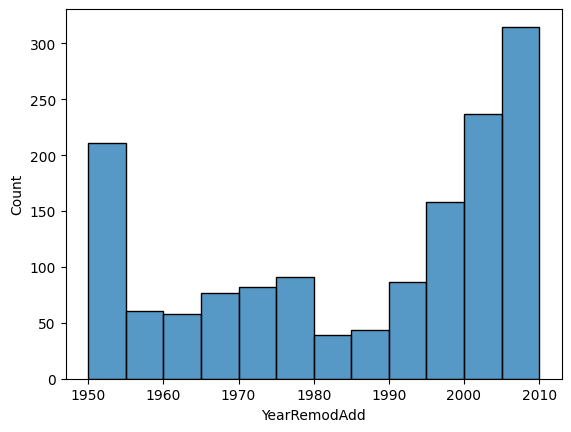

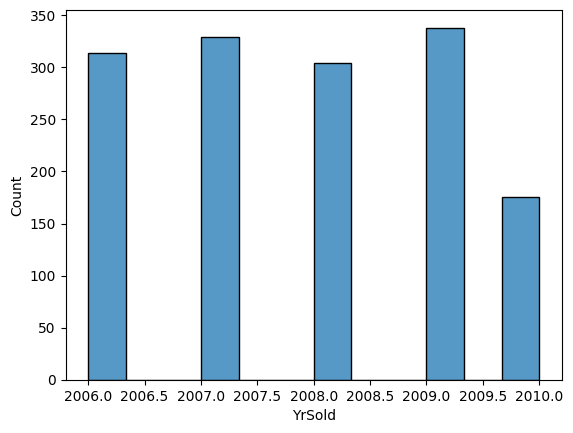

In [34]:
for i in numvar:
    sns.histplot(x=df[i])
    plt.show()

## Bivariate Analysis

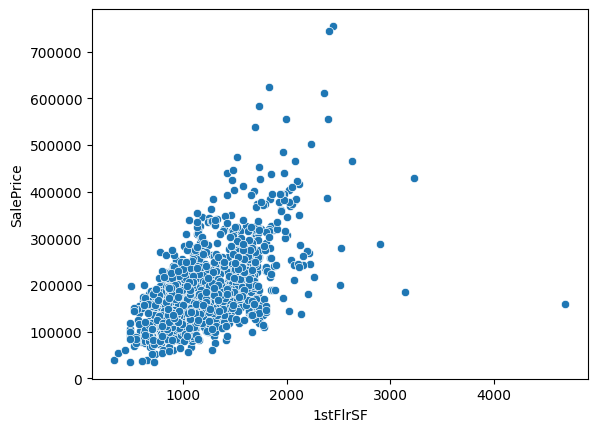

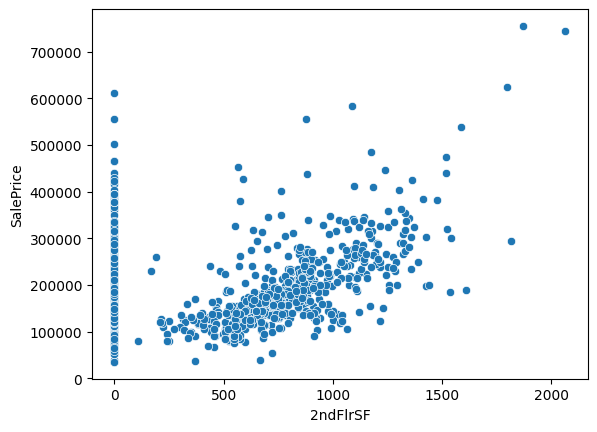

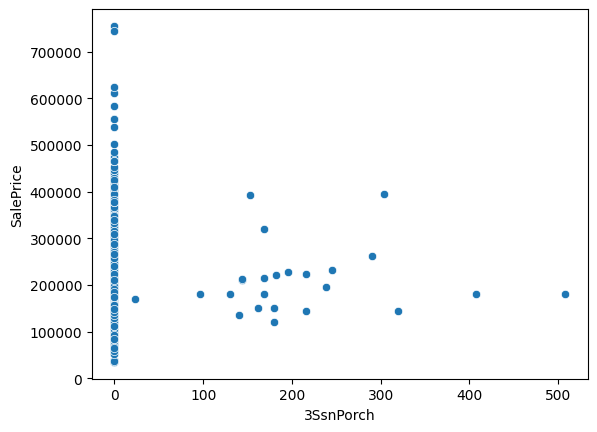

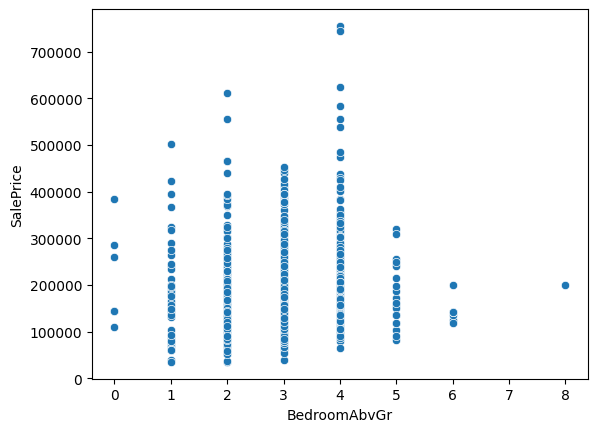

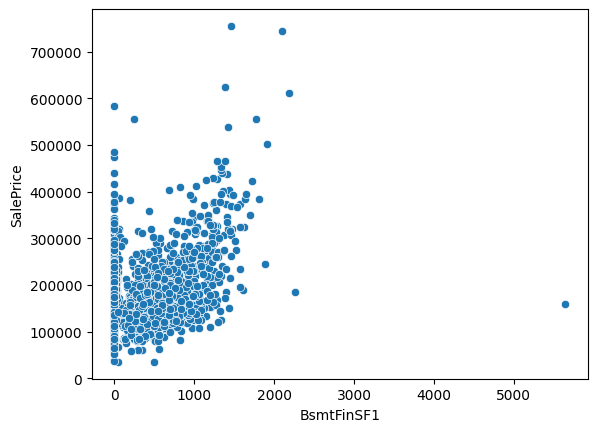

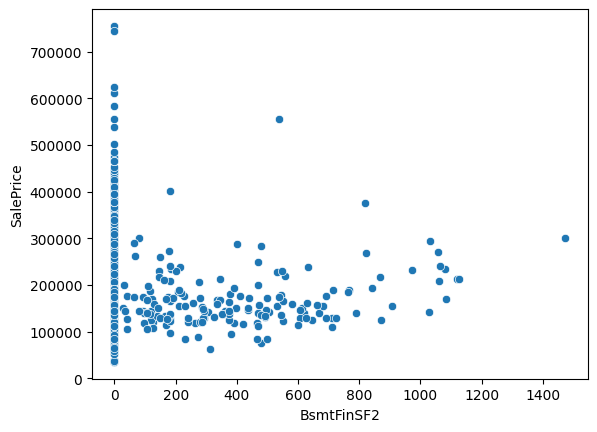

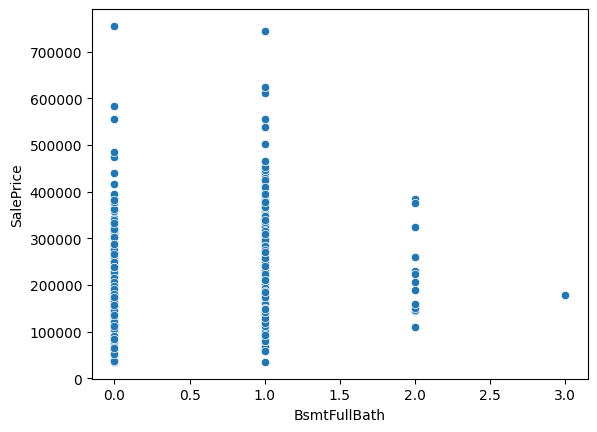

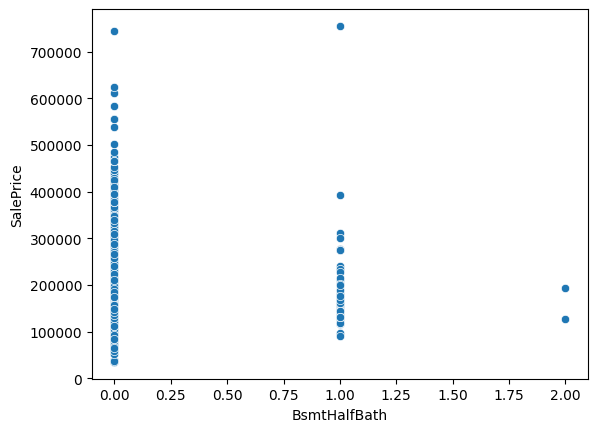

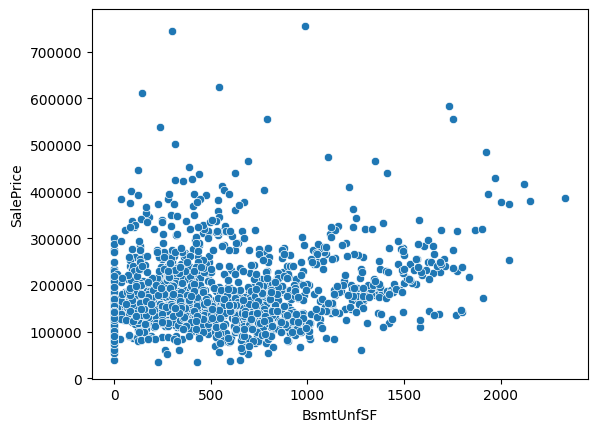

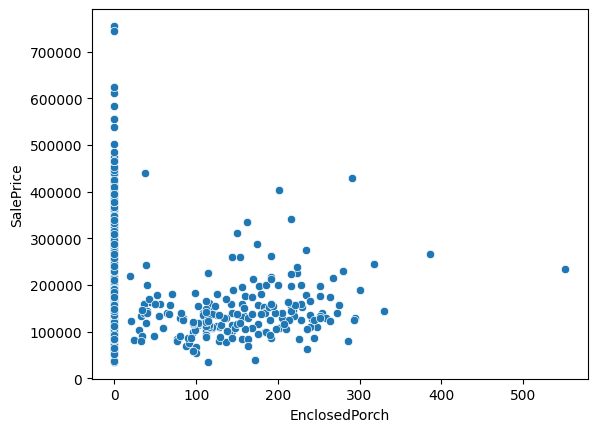

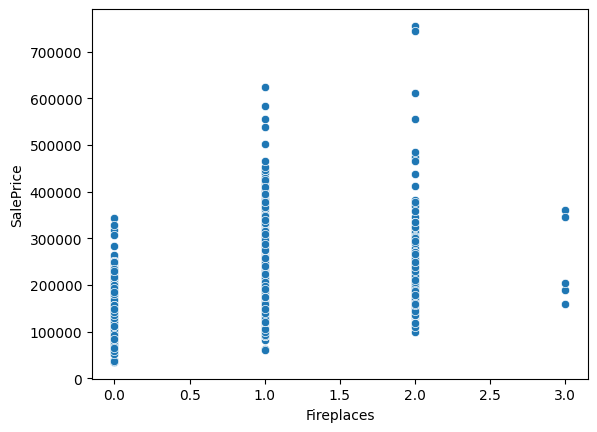

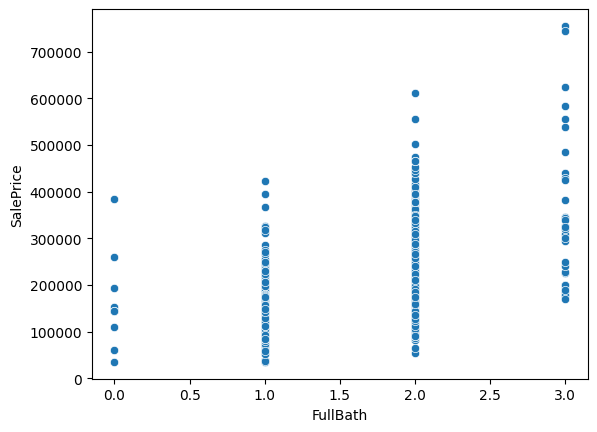

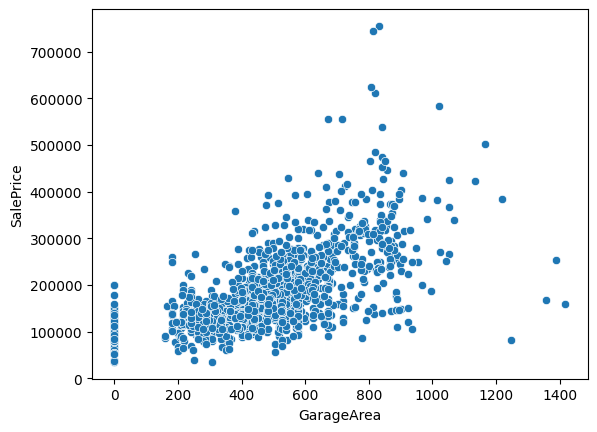

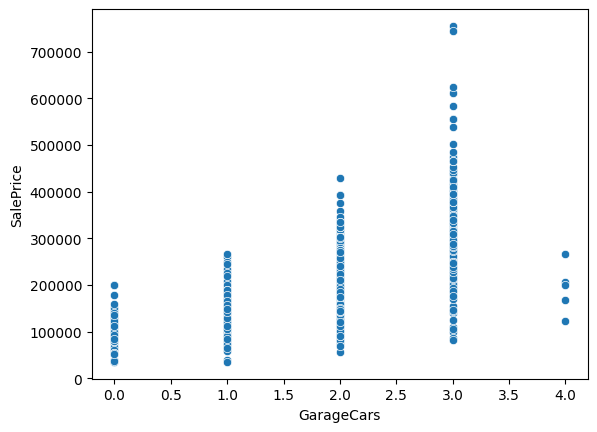

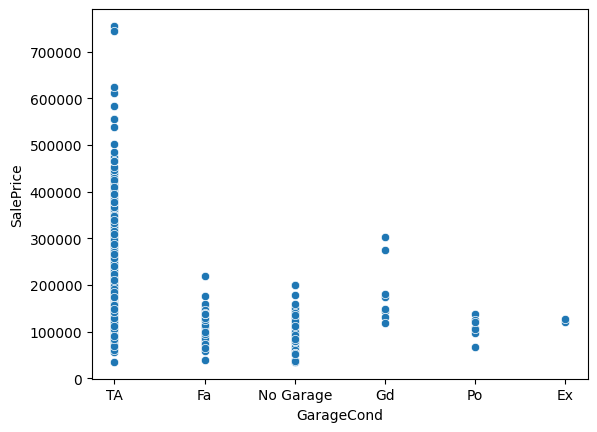

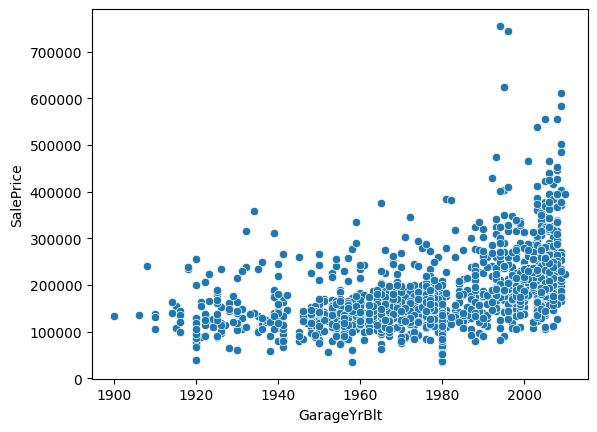

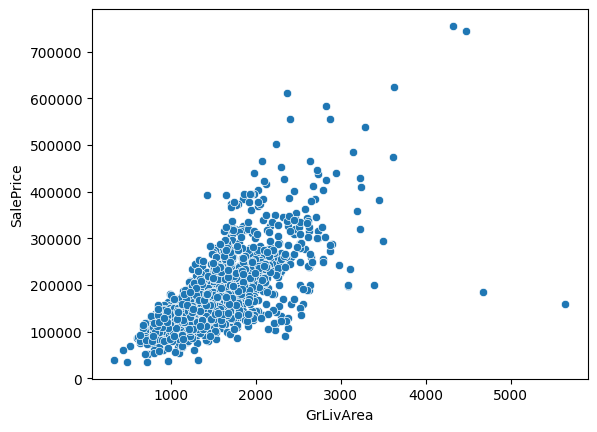

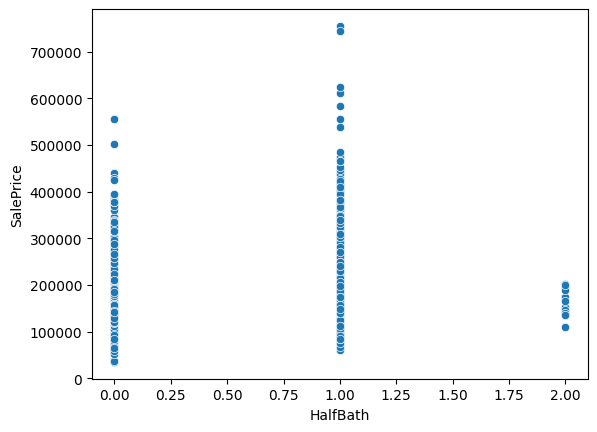

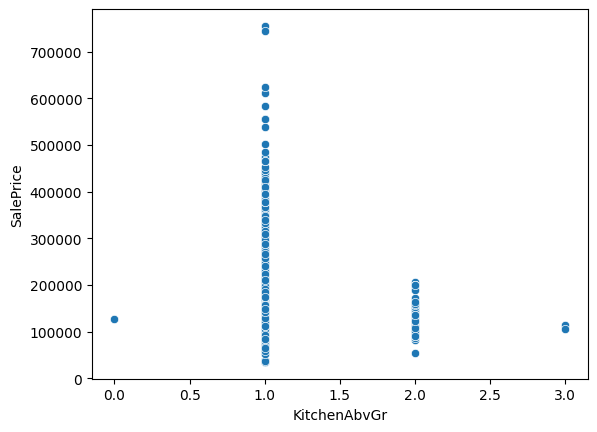

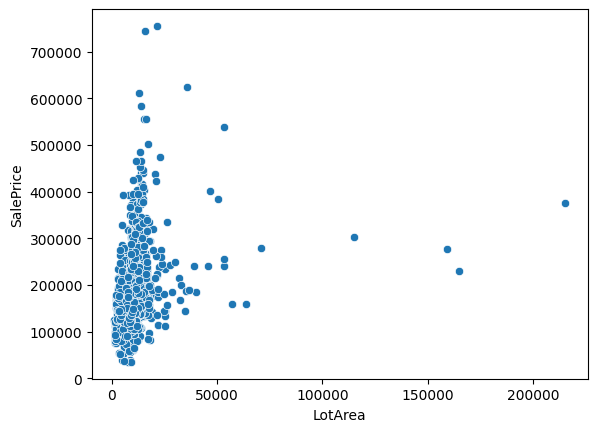

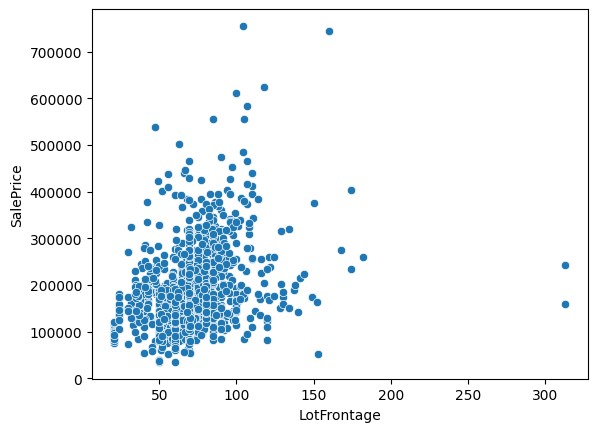

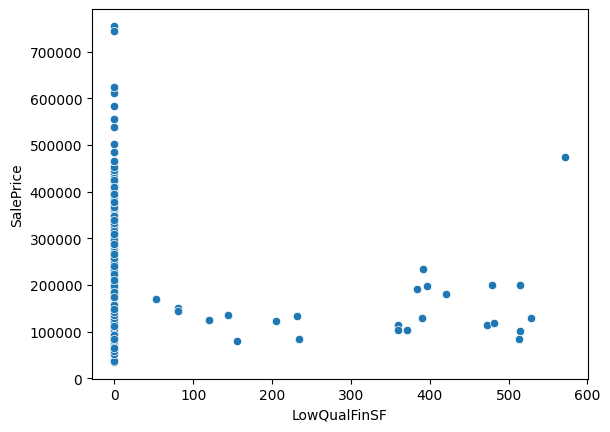

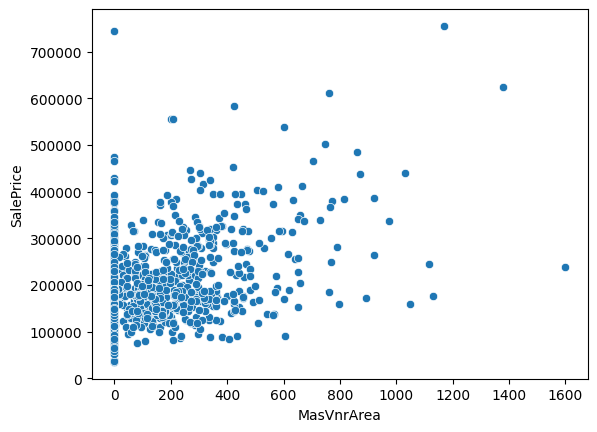

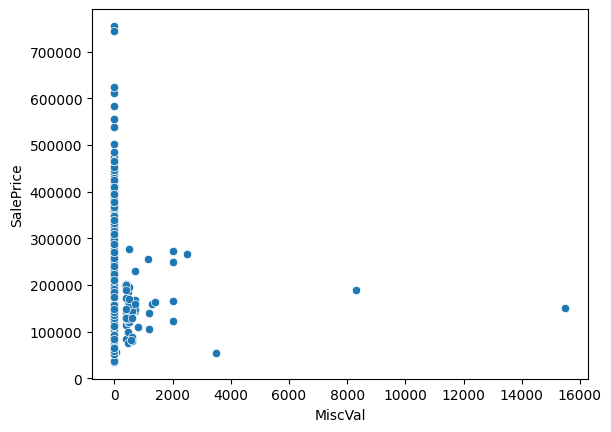

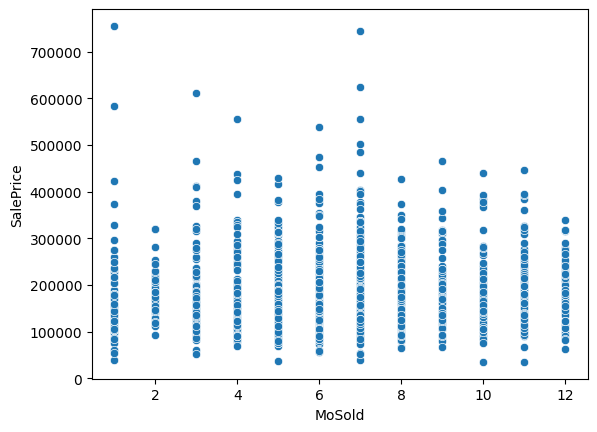

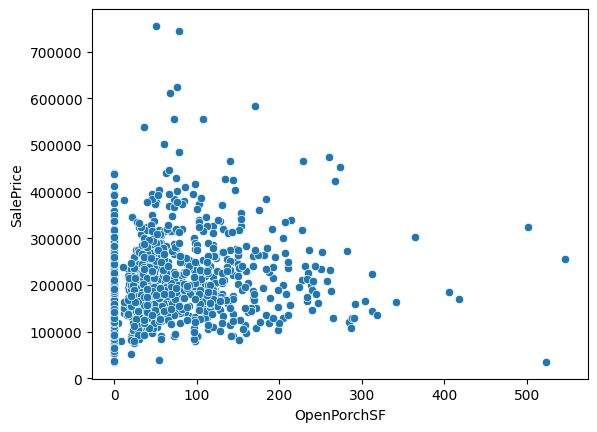

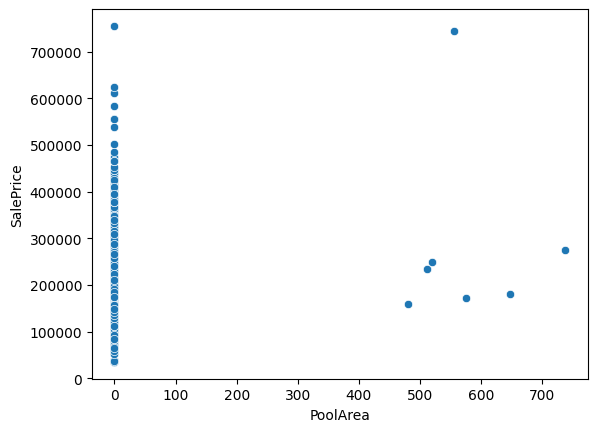

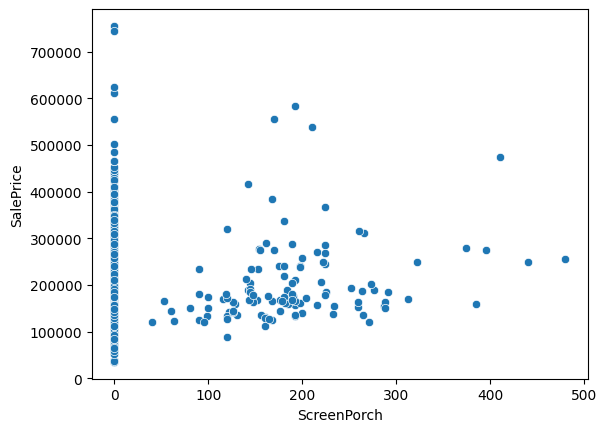

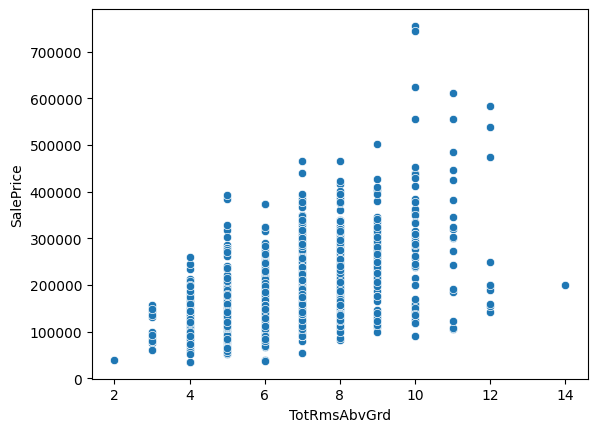

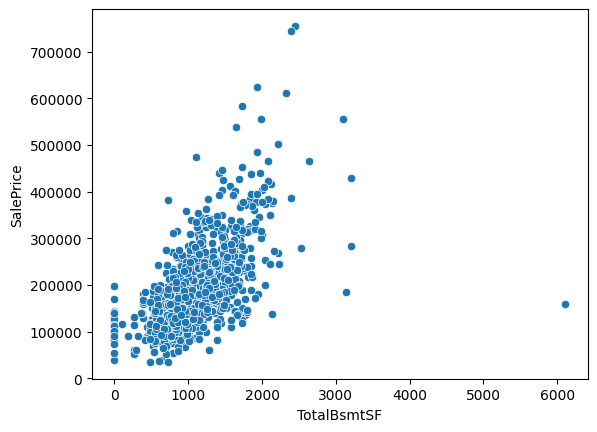

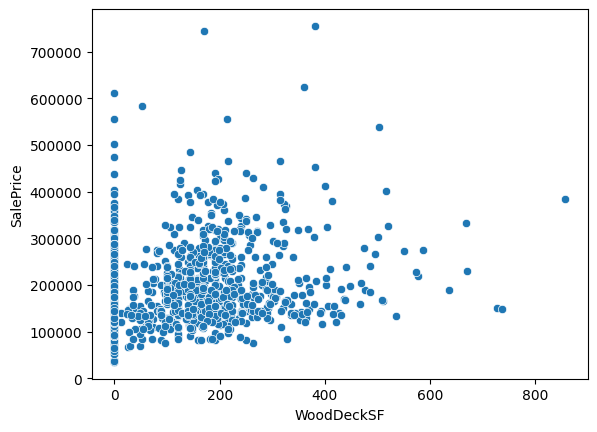

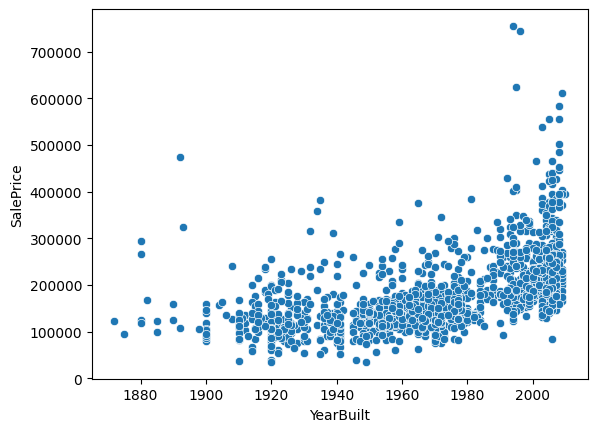

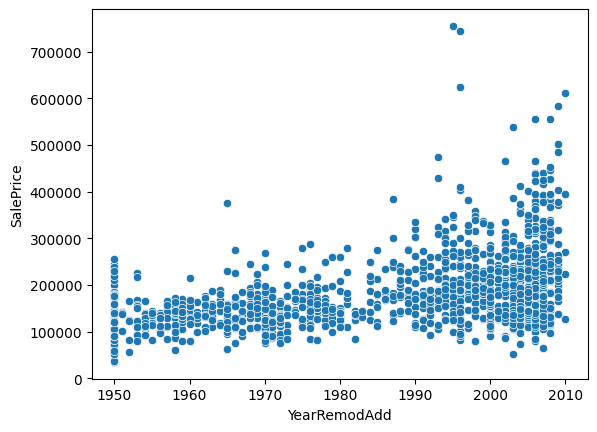

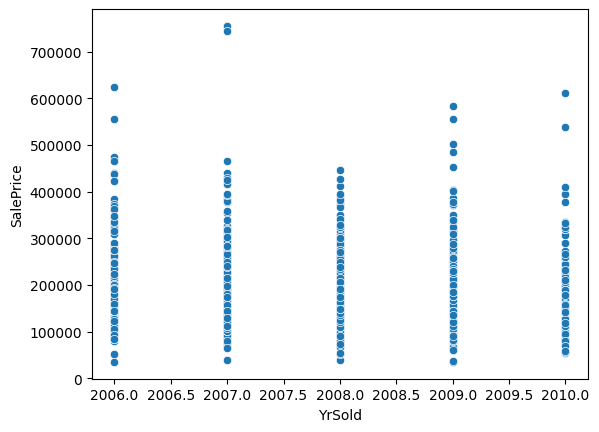

In [35]:
for i in numvar:
    sns.scatterplot(x=df[i],y=df['SalePrice'])
    plt.show()

In [36]:
# From the univariate analysis you understand that a lot of these values are constant or dominate very minor presence of a few other values does not matter.
df=df.drop(['3SsnPorch','EnclosedPorch','GarageCond','KitchenAbvGr','LowQualFinSF','MiscVal','PoolArea','ScreenPorch'],axis=1)


## Categorical data and dummy values creation

In [37]:
df.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street            Alley LotShape  \
0          60       RL         65.0     8450   Pave  No alley access      Reg   
1          20       RL         80.0     9600   Pave  No alley access      Reg   
2          60       RL         68.0    11250   Pave  No alley access      IR1   
3          70       RL         60.0     9550   Pave  No alley access      IR1   
4          60       RL         84.0    14260   Pave  No alley access      IR1   

  LandContour Utilities LotConfig  ... PavedDrive WoodDeckSF OpenPorchSF  \
0         Lvl    AllPub    Inside  ...          Y          0          61   
1         Lvl    AllPub       FR2  ...          Y        298           0   
2         Lvl    AllPub    Inside  ...          Y          0          42   
3         Lvl    AllPub    Corner  ...          Y          0          35   
4         Lvl    AllPub       FR2  ...          Y        192          84   

    PoolQC     Fence MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0  No Pool  No Fence      2    2008        WD         Normal     208500  
1  No Pool  No Fence      5    2007        WD         Normal     181500  
2  No Pool  No Fence      9    2008        WD         Normal     223500  
3  No Pool  No Fence      2    2006        WD        Abnorml     140000  
4  No Pool  No Fence     12    2008        WD         Normal     250000  

[5 rows x 70 columns]

## Univariate Analysis

In [38]:
catvar

['MSSubClass',
 'MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'Street',
 'CentralAir']

In [39]:
#building a list of categorical variables.
catvar=['MSSubClass','MSZoning','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','PavedDrive','PoolQC','Fence','SaleType','SaleCondition','Street','CentralAir']

#The following are not binary variables
dummycatvar=['MSSubClass','MSZoning','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','PavedDrive','PoolQC','Fence','SaleType','SaleCondition']


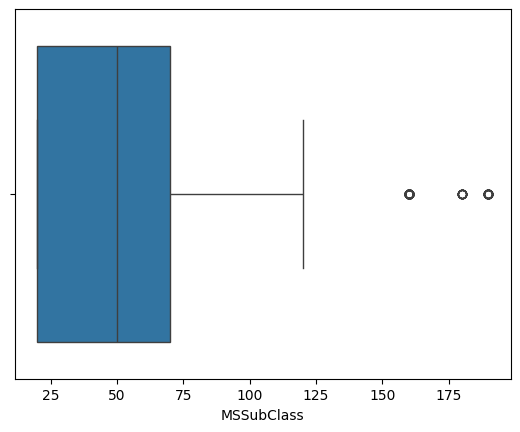

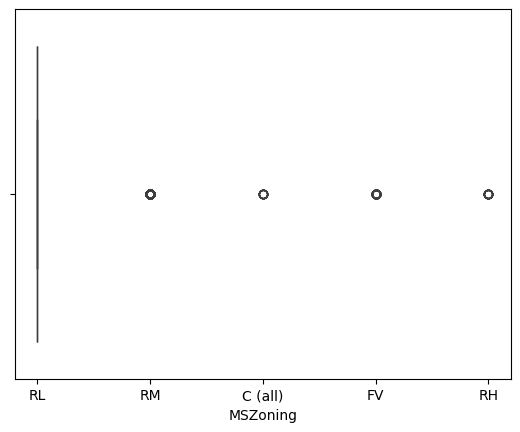

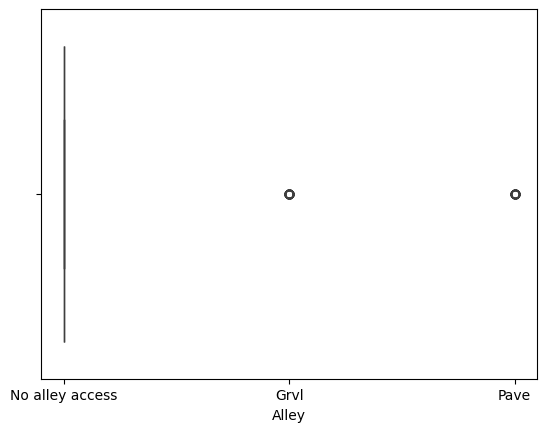

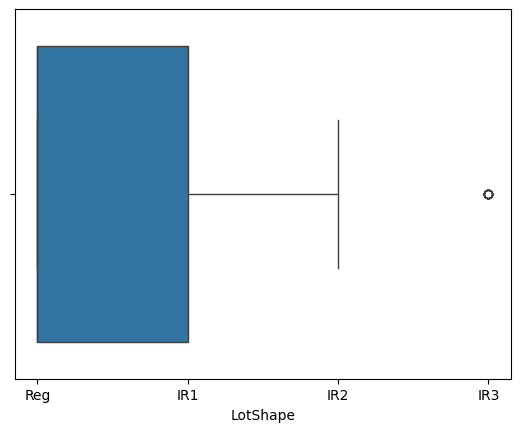

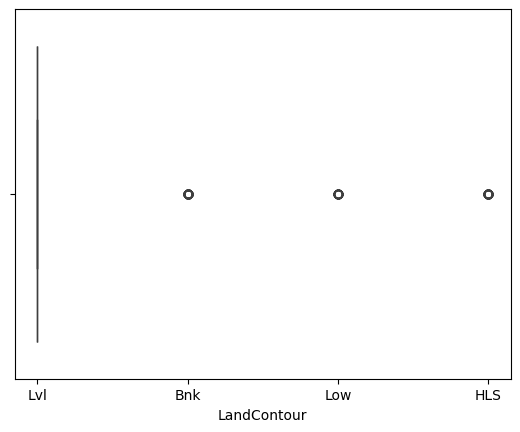

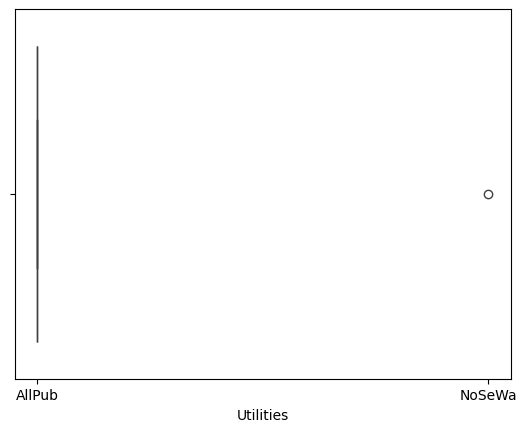

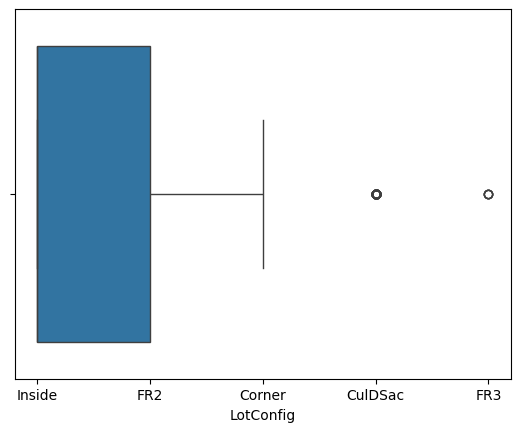

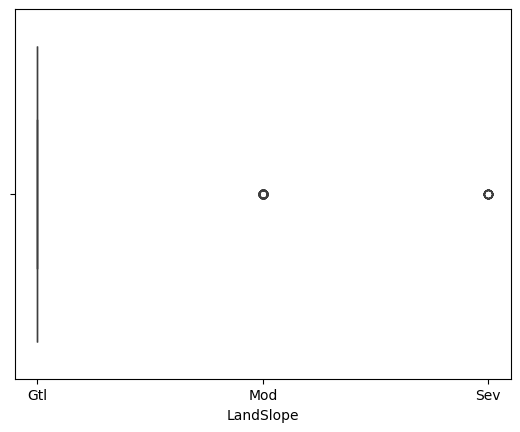

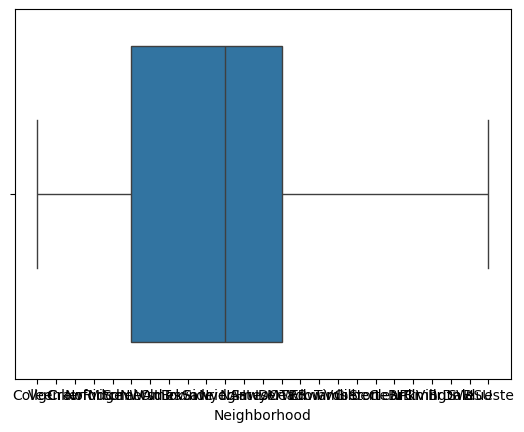

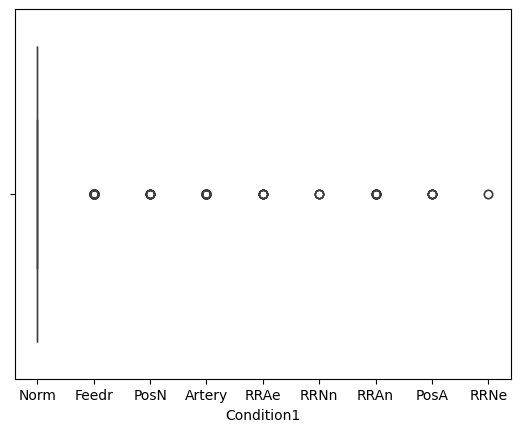

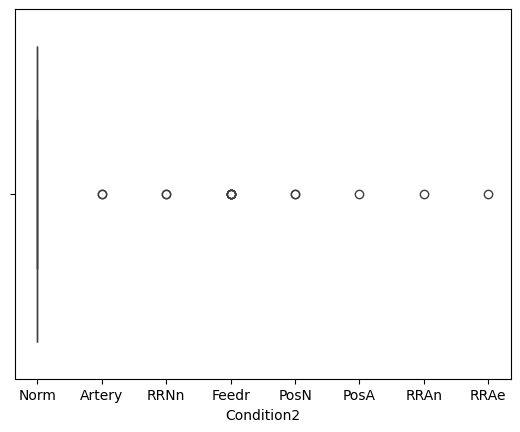

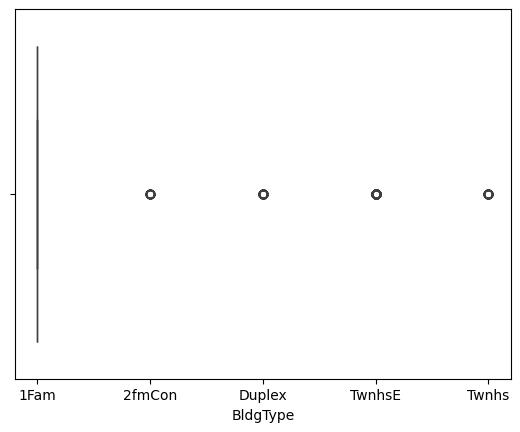

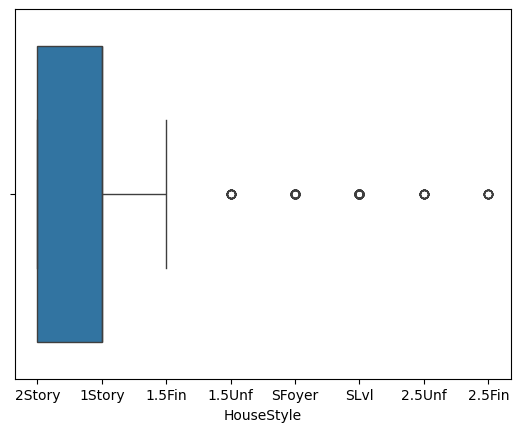

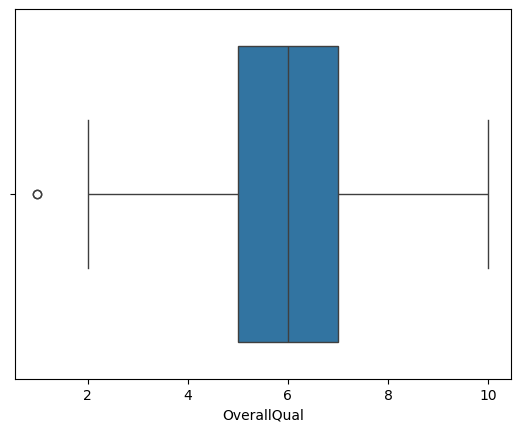

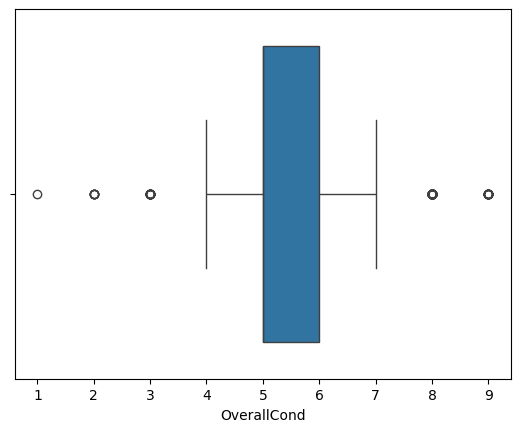

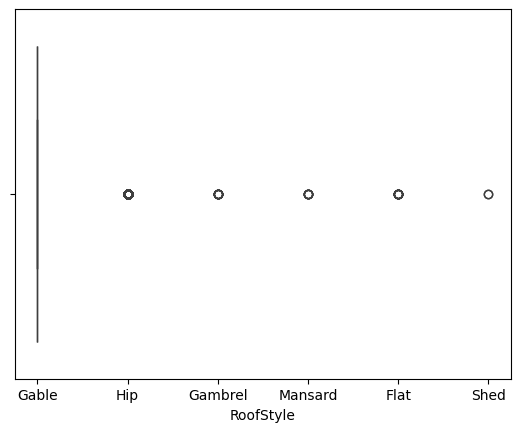

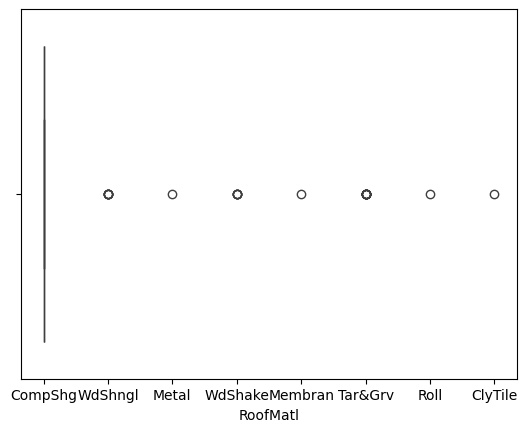

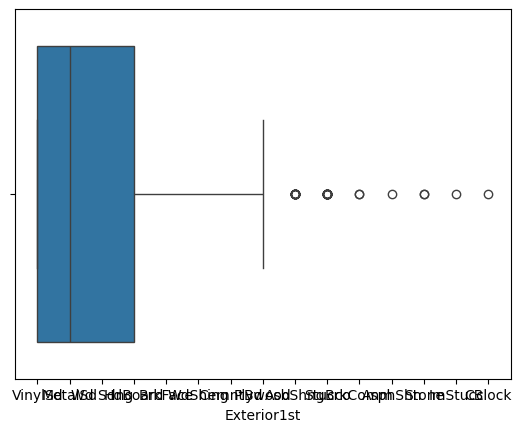

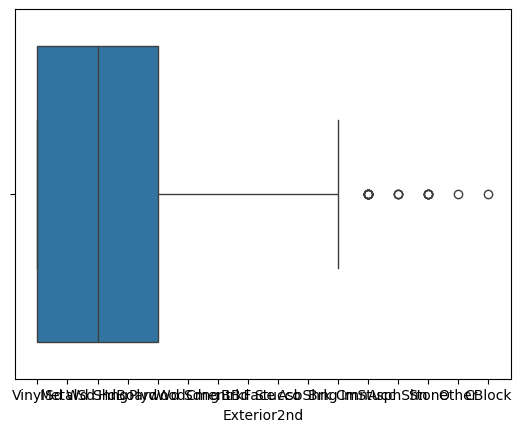

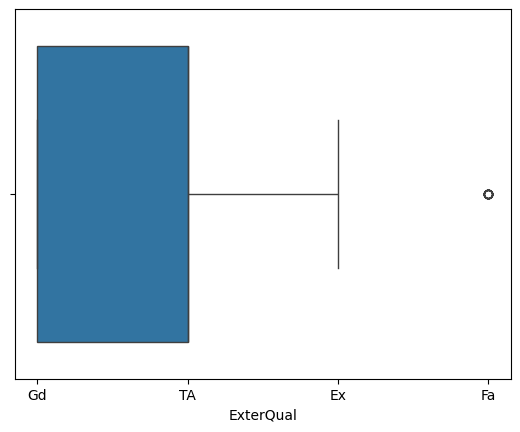

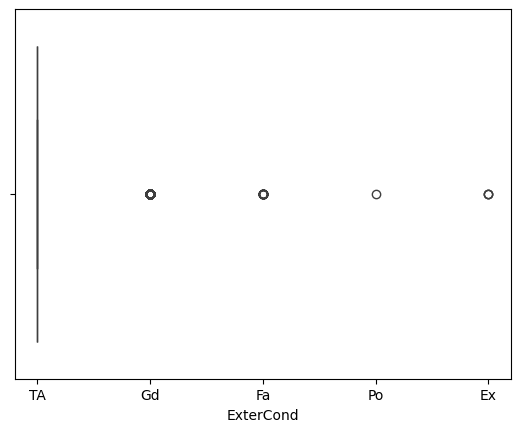

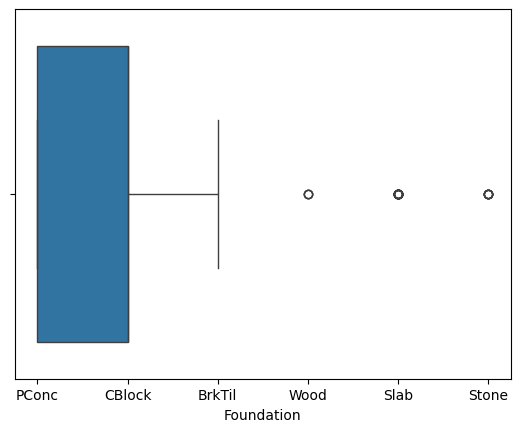

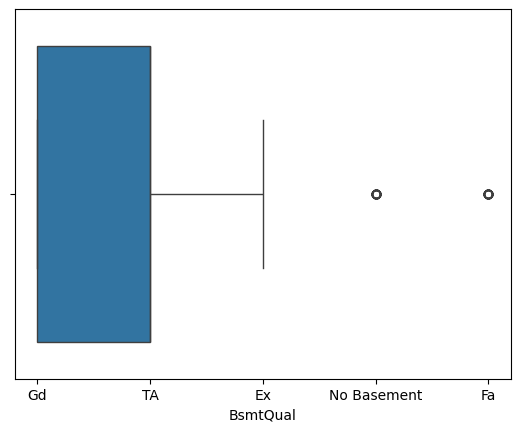

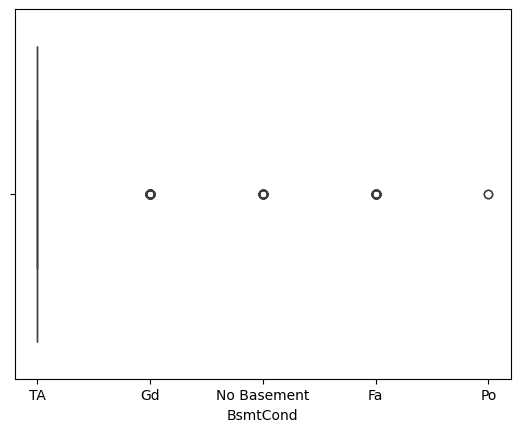

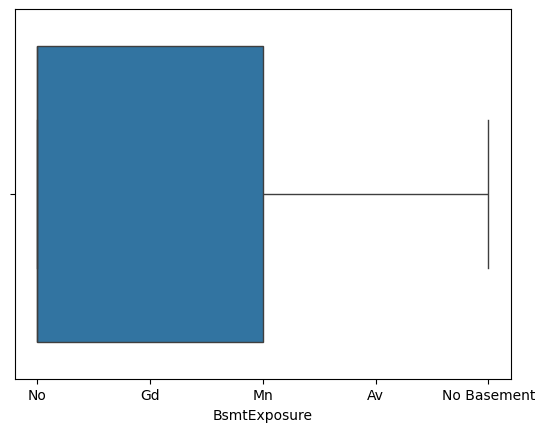

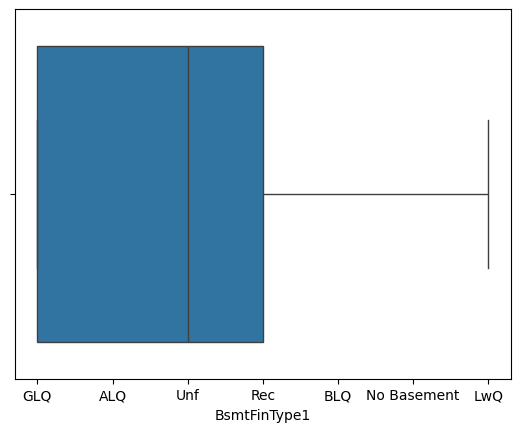

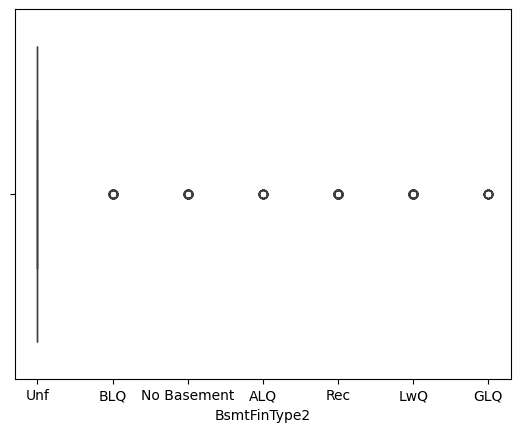

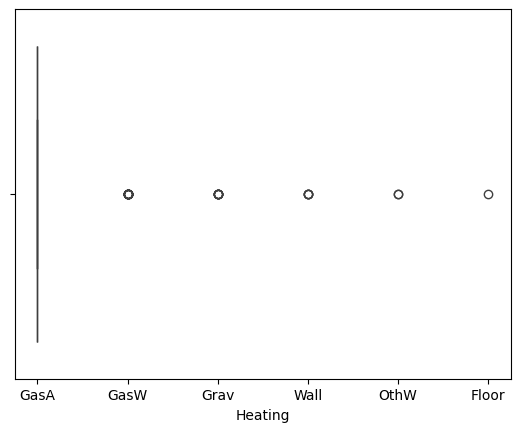

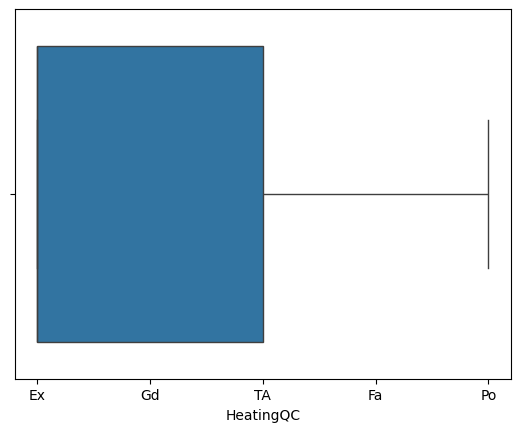

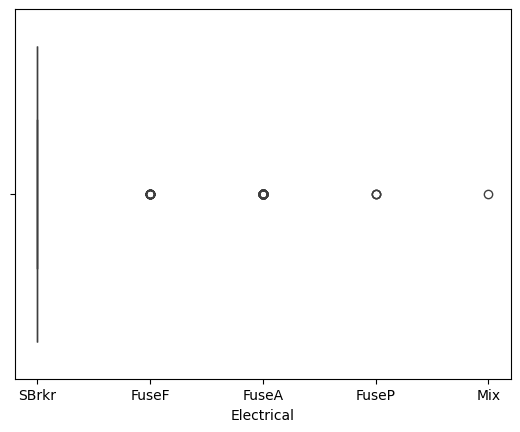

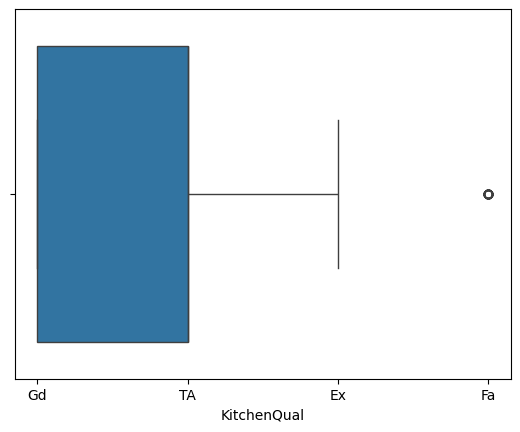

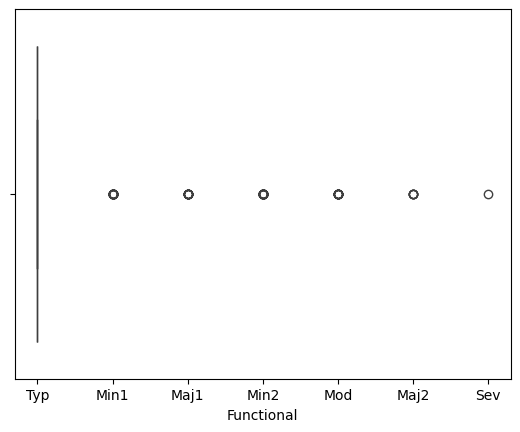

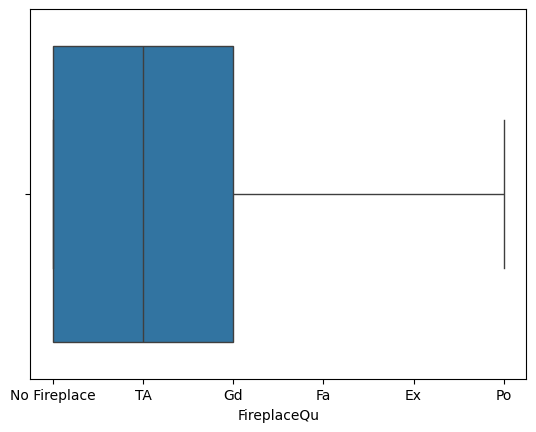

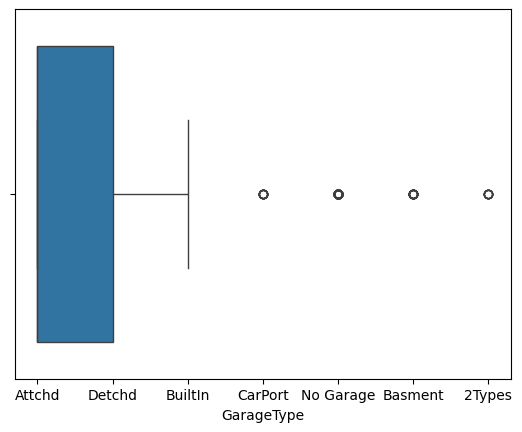

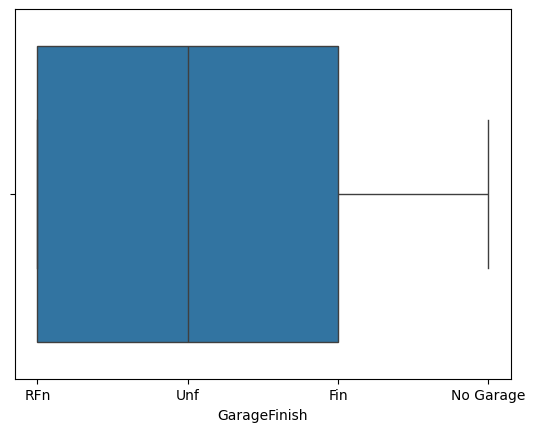

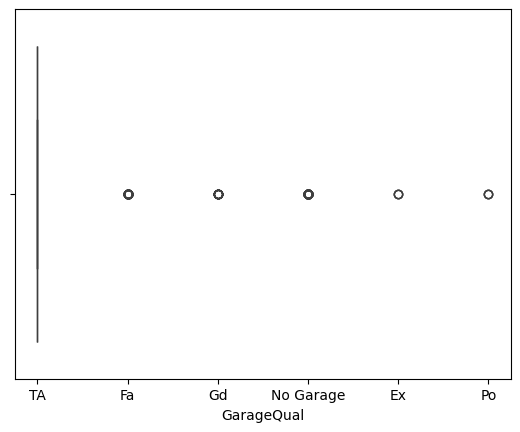

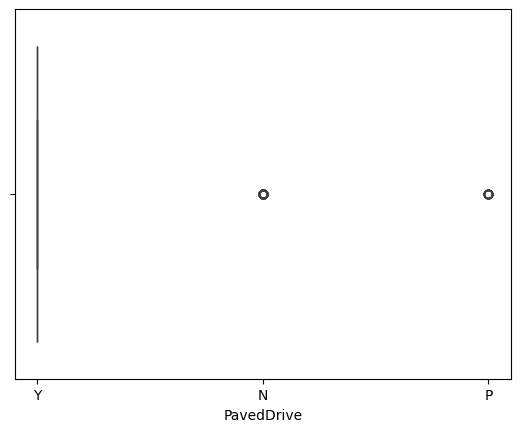

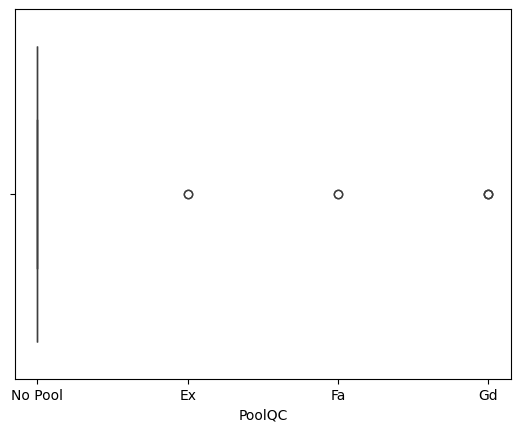

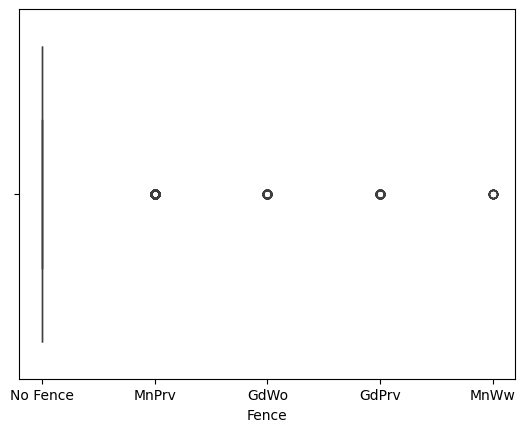

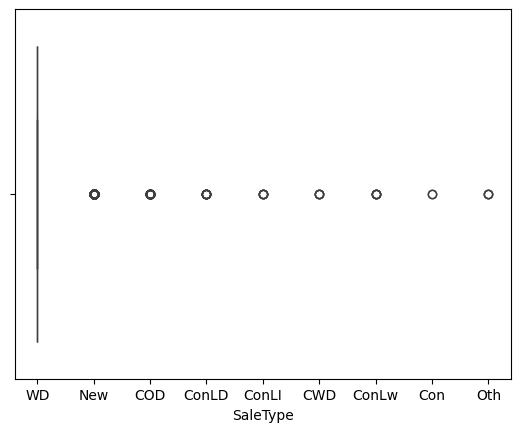

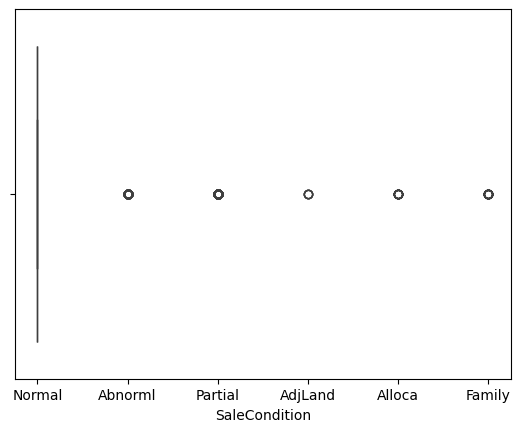

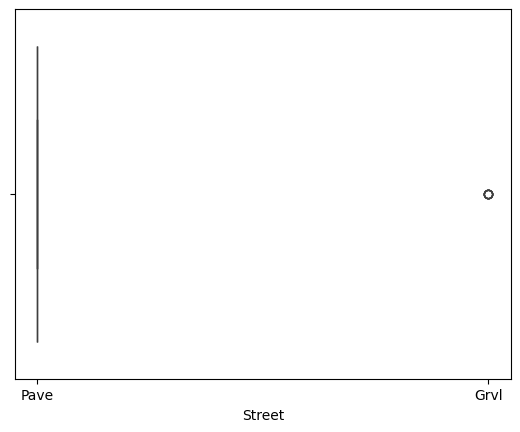

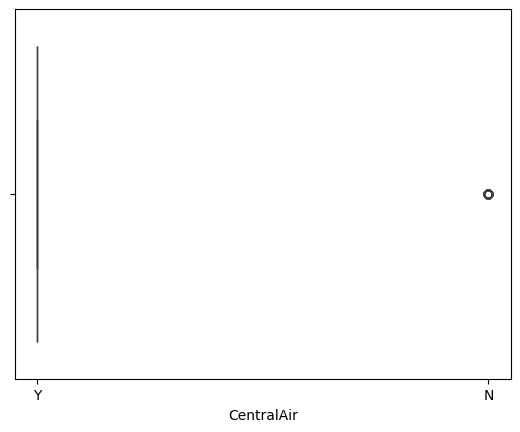

In [40]:
for i in catvar:
    sns.boxplot(x=df[i])
    plt.show()

## Bivariate Analysis Categorical

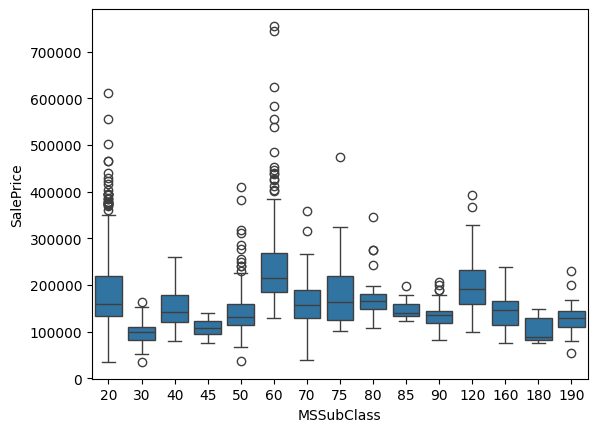

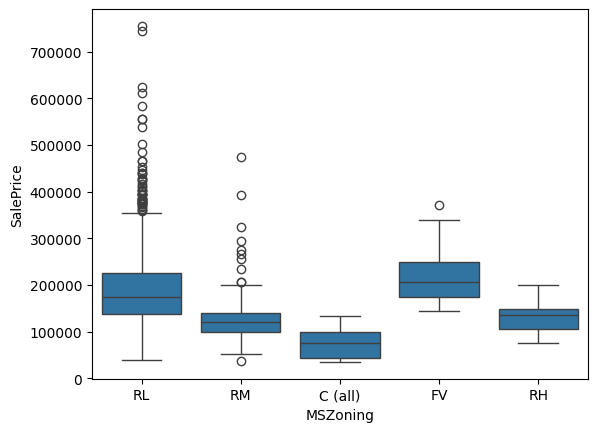

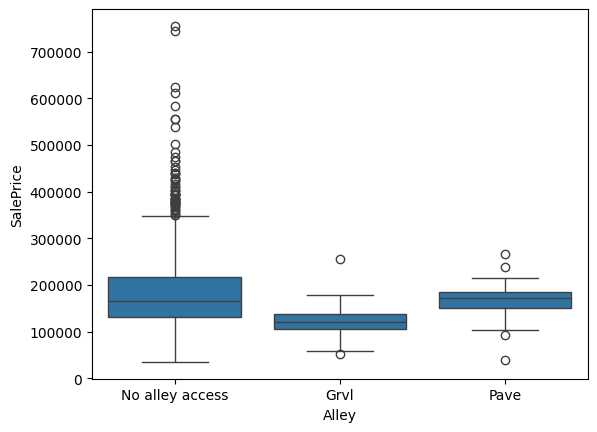

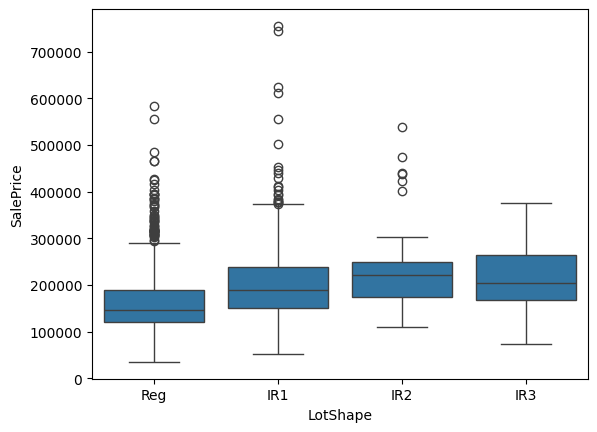

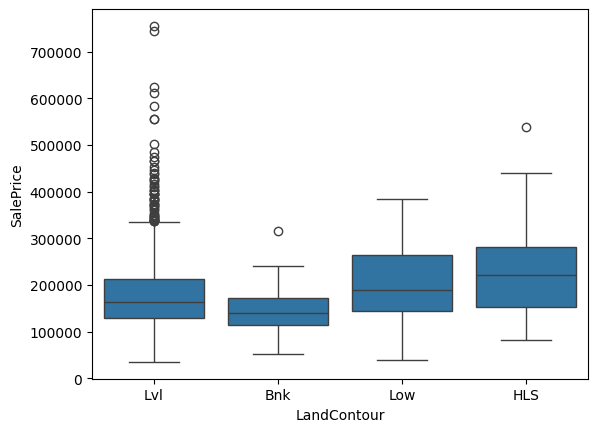

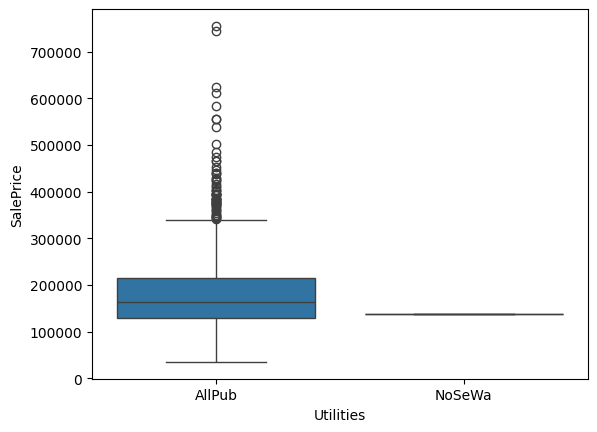

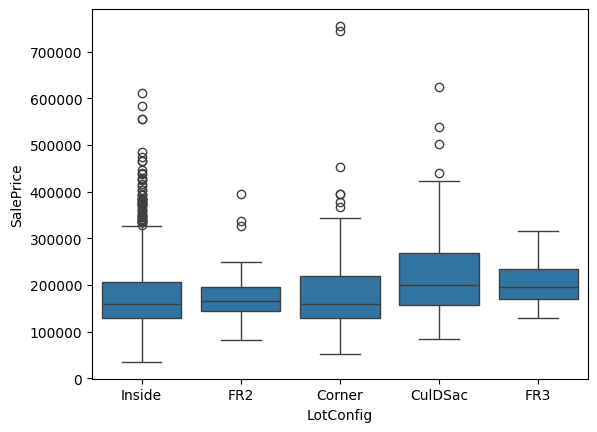

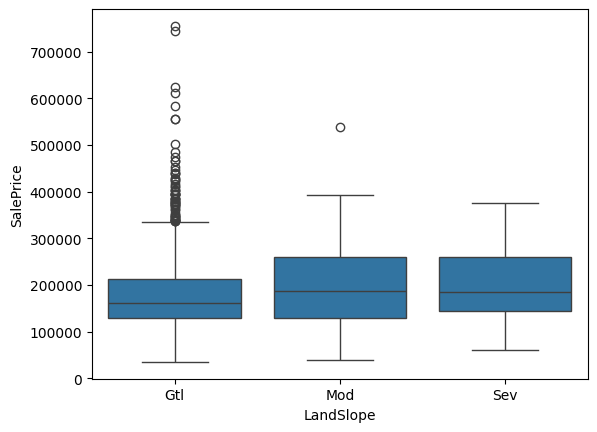

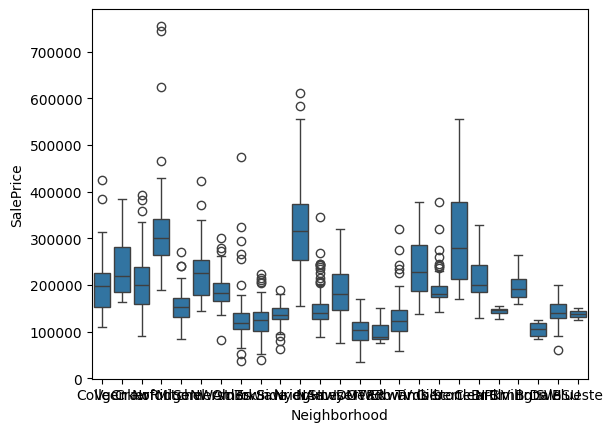

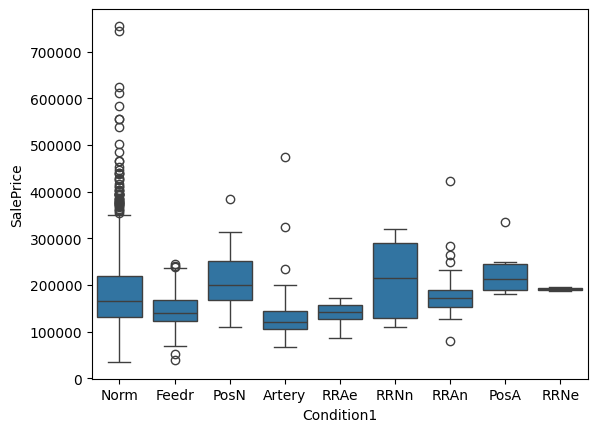

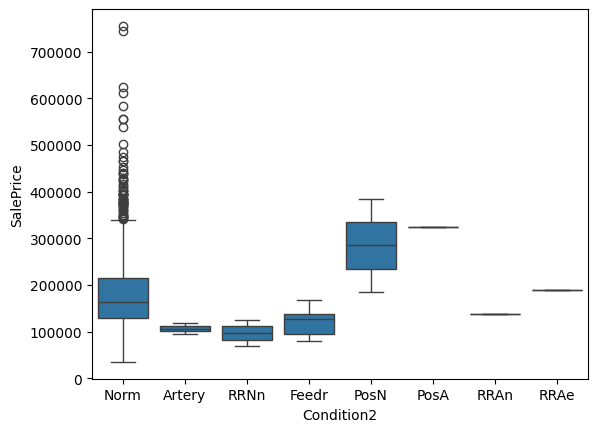

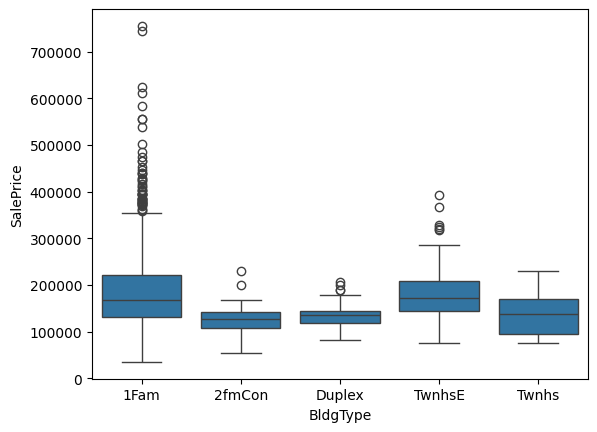

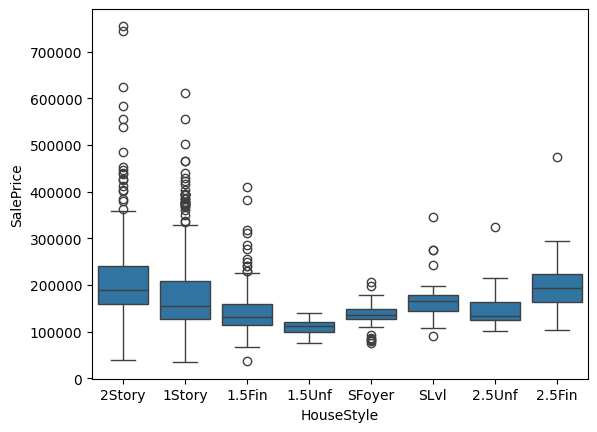

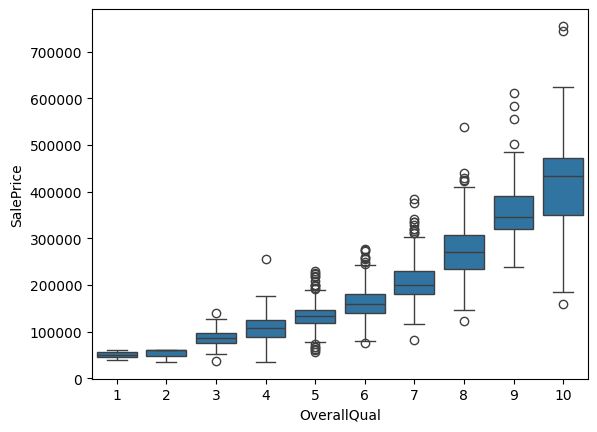

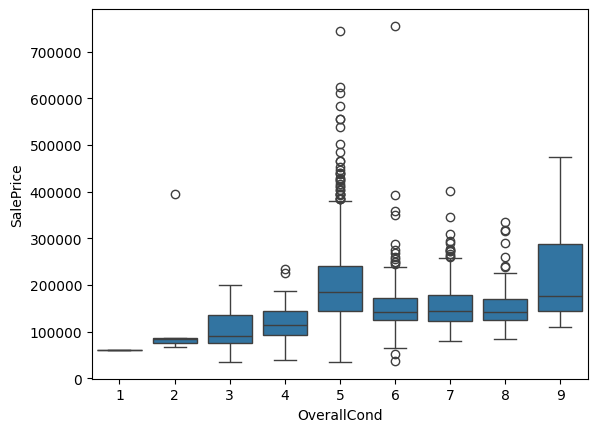

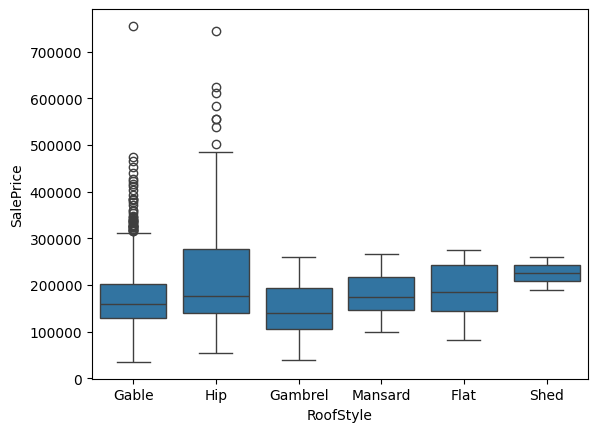

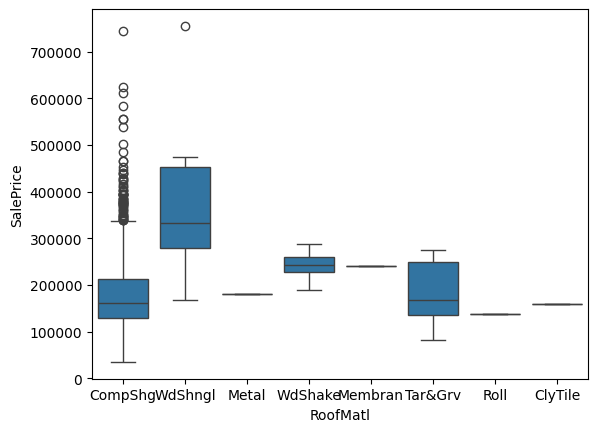

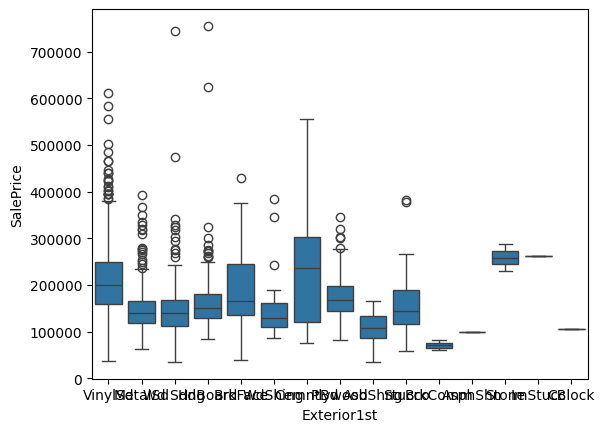

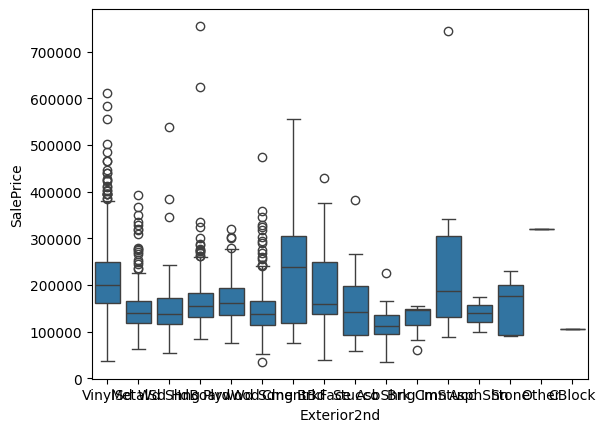

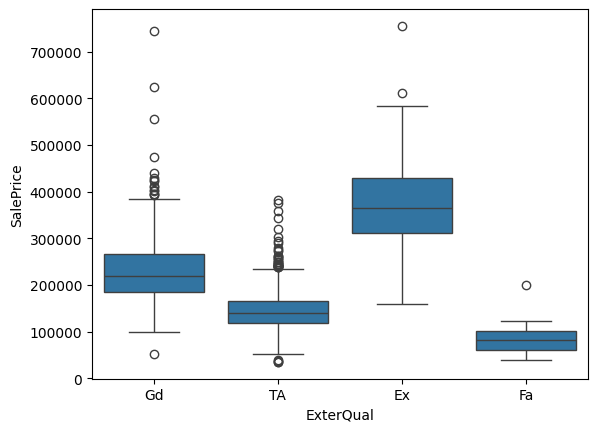

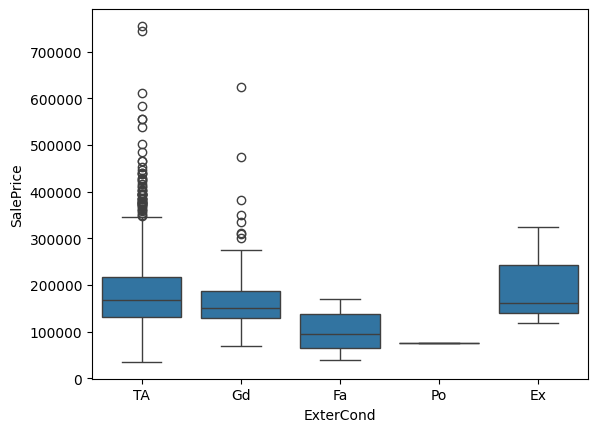

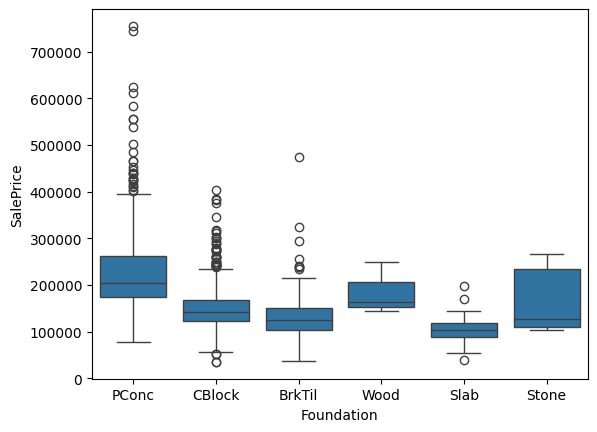

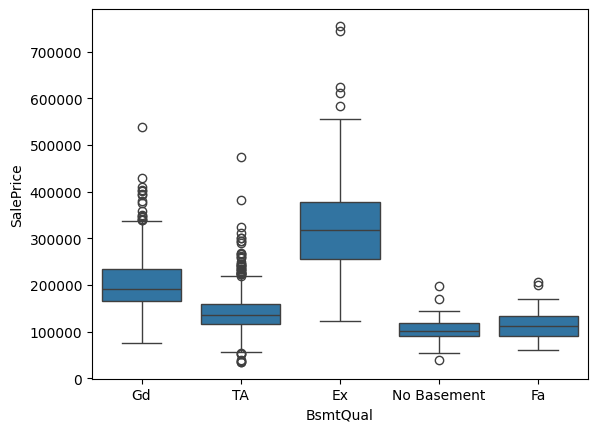

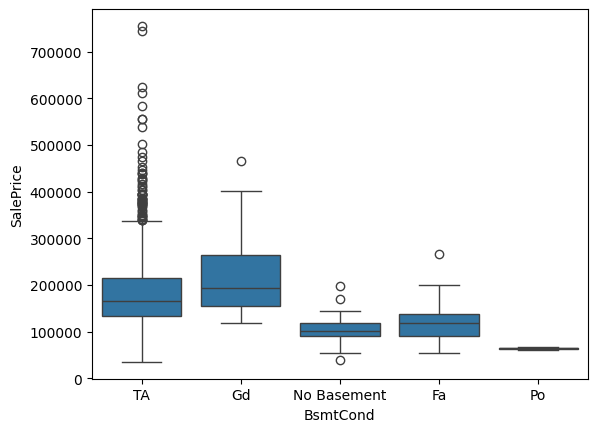

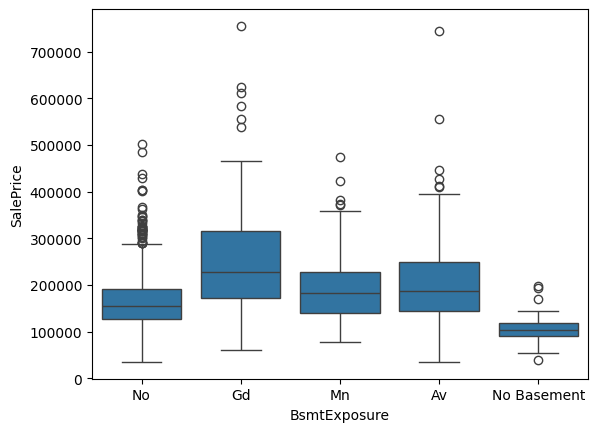

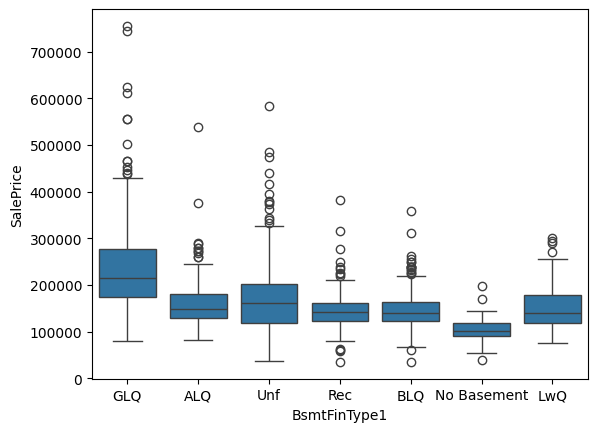

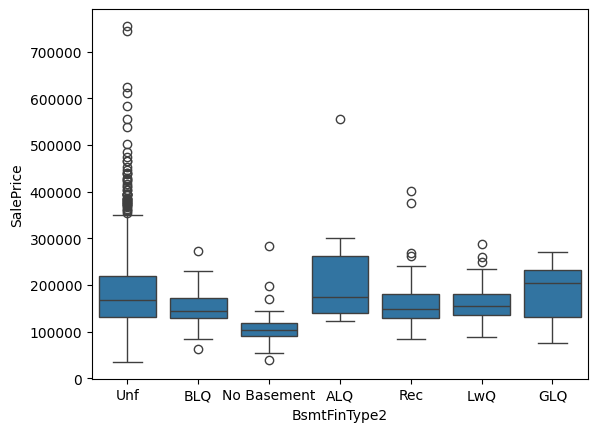

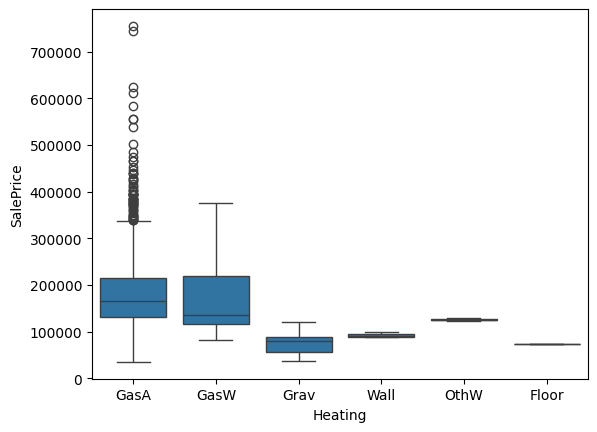

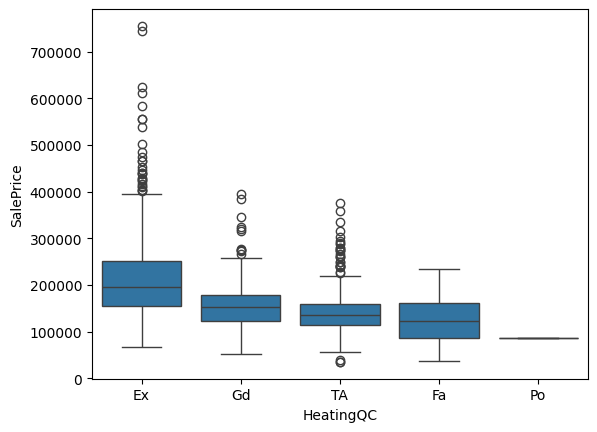

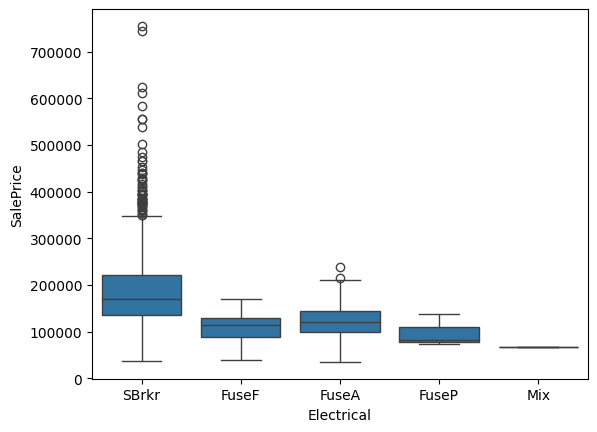

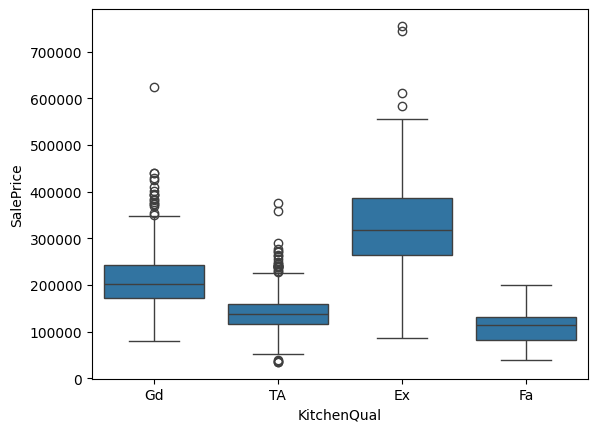

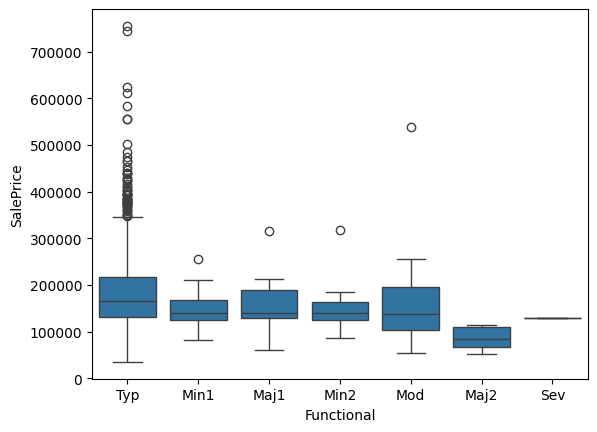

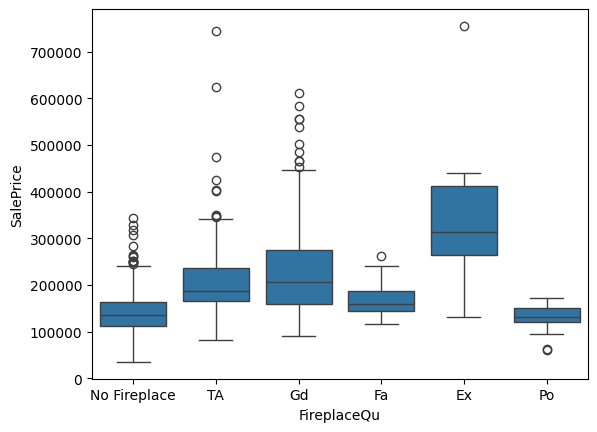

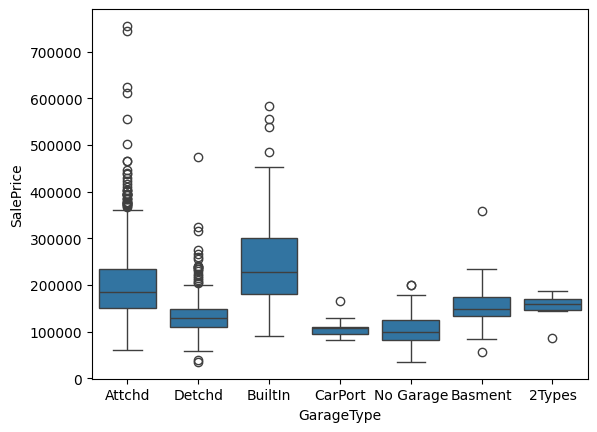

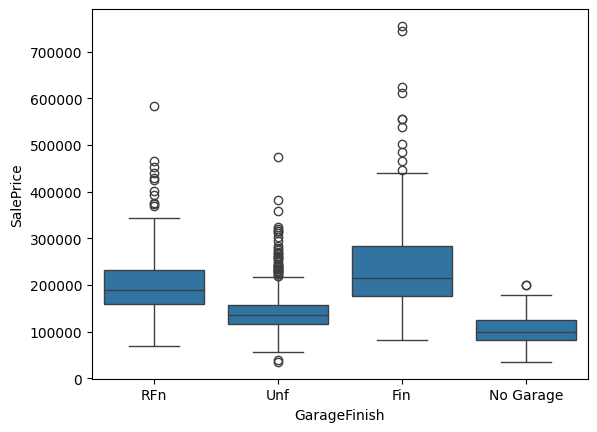

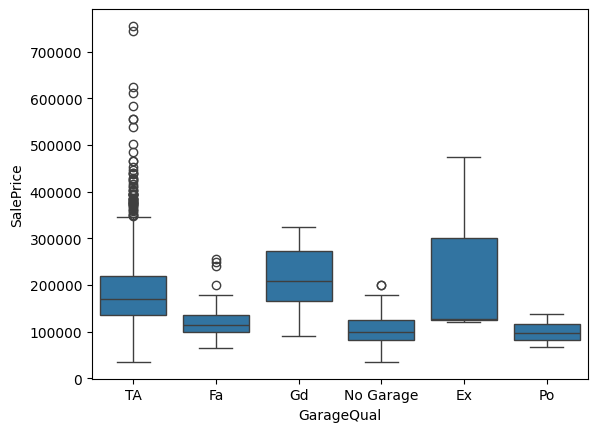

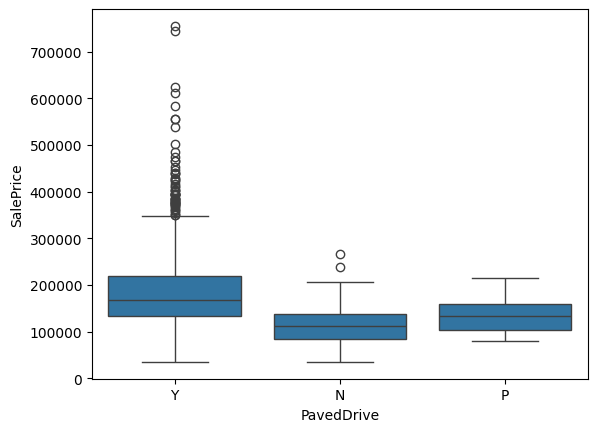

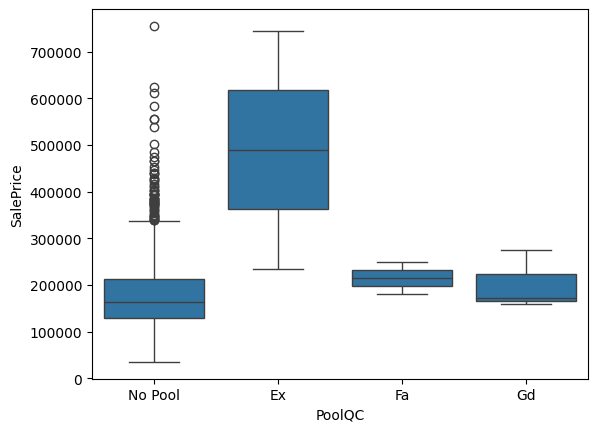

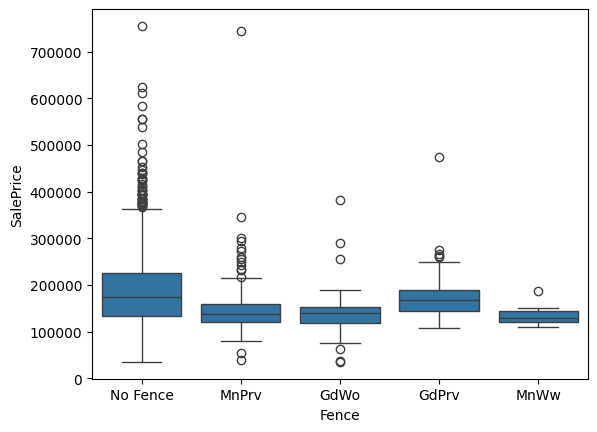

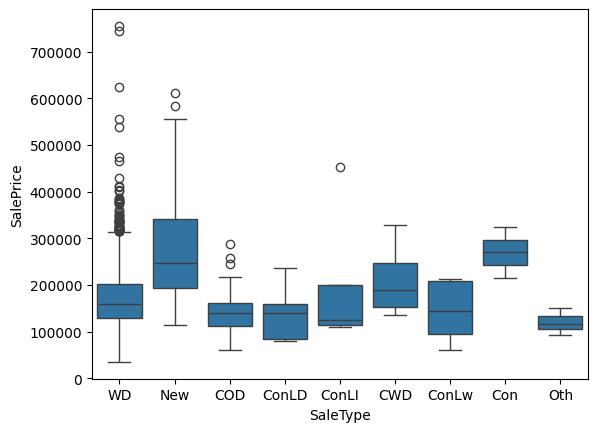

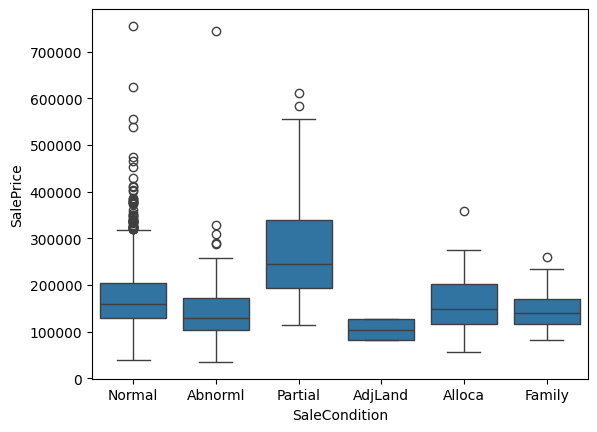

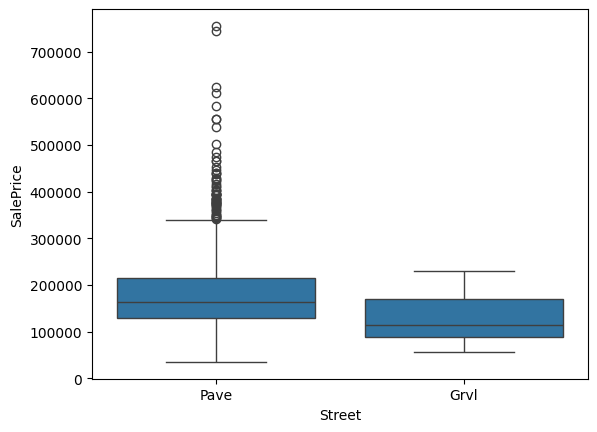

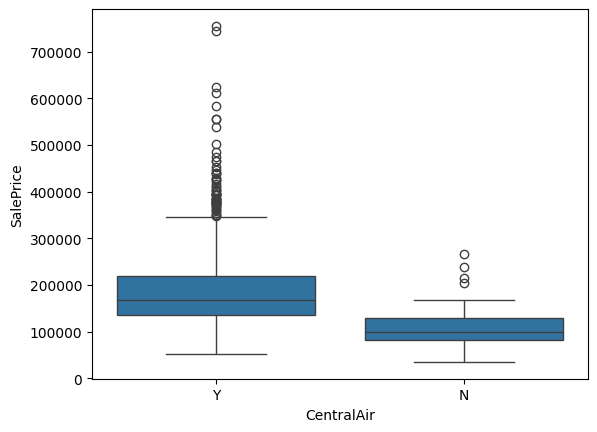

In [41]:
for i in catvar:
    sns.boxplot(x=df[i],y=df['SalePrice'])
    plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [43]:
for i in dummycatvar:
    print(i)
    dum=pd.get_dummies(df[i],drop_first=True,dtype=int)
    print(df.shape)
    print(dum.shape)
    df=pd.concat([df,dum],axis=1)
    

MSSubClass
(1460, 70)
(1460, 14)
MSZoning
(1460, 84)
(1460, 4)
Alley
(1460, 88)
(1460, 2)
LotShape
(1460, 90)
(1460, 3)
LandContour
(1460, 93)
(1460, 3)
Utilities
(1460, 96)
(1460, 1)
LotConfig
(1460, 97)
(1460, 4)
LandSlope
(1460, 101)
(1460, 2)
Neighborhood
(1460, 103)
(1460, 24)
Condition1
(1460, 127)
(1460, 8)
Condition2
(1460, 135)
(1460, 7)
BldgType
(1460, 142)
(1460, 4)
HouseStyle
(1460, 146)
(1460, 7)
OverallQual
(1460, 153)
(1460, 9)
OverallCond
(1460, 162)
(1460, 8)
RoofStyle
(1460, 170)
(1460, 5)
RoofMatl
(1460, 175)
(1460, 7)
Exterior1st
(1460, 182)
(1460, 14)
Exterior2nd
(1460, 196)
(1460, 15)
ExterQual
(1460, 211)
(1460, 3)
ExterCond
(1460, 214)
(1460, 4)
Foundation
(1460, 218)
(1460, 5)
BsmtQual
(1460, 223)
(1460, 4)
BsmtCond
(1460, 227)
(1460, 4)
BsmtExposure
(1460, 231)
(1460, 4)
BsmtFinType1
(1460, 235)
(1460, 6)
BsmtFinType2
(1460, 241)
(1460, 6)
Heating
(1460, 247)
(1460, 5)
HeatingQC
(1460, 252)
(1460, 4)
Electrical
(1460, 256)
(1460, 4)
KitchenQual
(1460, 260)
(14

In [44]:
#df['BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
df['TotalBsmtSF']

0        856
1       1262
2        920
3        756
4       1145
        ... 
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, Length: 1460, dtype: int64

In [45]:
#Dropping columns after creating dummies
df=df.drop(['MSSubClass','MSZoning','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','PavedDrive','PoolQC','Fence','SaleType','SaleCondition'],axis=1)

In [46]:
df.columns

Index([ 'LotFrontage',      'LotArea',       'Street',    'YearBuilt',
       'YearRemodAdd',   'MasVnrArea',   'CentralAir',     '1stFlrSF',
           '2ndFlrSF',    'GrLivArea',
       ...
              'ConLI',        'ConLw',          'New',          'Oth',
                 'WD',      'AdjLand',       'Alloca',       'Family',
             'Normal',      'Partial'],
      dtype='object', length=265)

In [47]:
df.columns

Index([ 'LotFrontage',      'LotArea',       'Street',    'YearBuilt',
       'YearRemodAdd',   'MasVnrArea',   'CentralAir',     '1stFlrSF',
           '2ndFlrSF',    'GrLivArea',
       ...
              'ConLI',        'ConLw',          'New',          'Oth',
                 'WD',      'AdjLand',       'Alloca',       'Family',
             'Normal',      'Partial'],
      dtype='object', length=265)

In [48]:
#df.columns=df.columns.astype(int)

In [49]:
df.head()

LotFrontage  LotArea Street  YearBuilt  YearRemodAdd  MasVnrArea  \
0         65.0     8450   Pave       2003          2003       196.0   
1         80.0     9600   Pave       1976          1976         0.0   
2         68.0    11250   Pave       2001          2002       162.0   
3         60.0     9550   Pave       1915          1970         0.0   
4         84.0    14260   Pave       2000          2000       350.0   

  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  ...  ConLI  ConLw  New  Oth  WD  \
0          Y       856       854       1710  ...      0      0    0    0   1   
1          Y      1262         0       1262  ...      0      0    0    0   1   
2          Y       920       866       1786  ...      0      0    0    0   1   
3          Y       961       756       1717  ...      0      0    0    0   1   
4          Y      1145      1053       2198  ...      0      0    0    0   1   

   AdjLand  Alloca  Family  Normal  Partial  
0        0       0       0       1        0  
1        0       0       0       1        0  
2        0       0       0       1        0  
3        0       0       0       0        0  
4        0       0       0       1        0  

[5 rows x 265 columns]

In [50]:
dum=pd.get_dummies(df["Street"],drop_first=True,dtype=int)
dum.head()

Pave
0     1
1     1
2     1
3     1
4     1

In [51]:
df=pd.concat([df,dum],axis=1)

In [52]:
dum=pd.get_dummies(df["CentralAir"],drop_first=True,dtype=int)
dum.head()

Y
0  1
1  1
2  1
3  1
4  1

In [53]:
df=pd.concat([df,dum],axis=1)

In [54]:
#df=df.drop(['LotFrontage'])

In [55]:
df=df.drop(['Street','CentralAir'],axis=1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 265 entries, LotFrontage to Y
dtypes: float64(3), int32(242), int64(20)
memory usage: 1.6 MB


In [57]:
#df.columns=df.columns.astype(float)

In [58]:
df.fillna(0,inplace=True)

In [59]:
#for i in df.columns:
 #   if df[i].isnull().sum()!=0:
  #      print(df[i])

In [60]:
#df['LotFrontage']=df['LotFrontage'].fillna(0)

In [61]:
df.isnull().sum()

LotFrontage     0
LotArea         0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
               ..
Family          0
Normal          0
Partial         0
Pave            0
Y               0
Length: 265, dtype: int64

In [62]:
df=df.dropna()

In [63]:
df.columns=df.columns.astype(str)

## Train Test Split

In [64]:
df.dtypes

LotFrontage     float64
LotArea           int64
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
                 ...   
Family            int32
Normal            int32
Partial           int32
Pave              int32
Y                 int32
Length: 265, dtype: object

In [65]:
X=df.drop(['SalePrice'],axis=1)

In [66]:
y=df["SalePrice"]

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [68]:
X_test.shape

(438, 264)

In [69]:
y_test.shape

(438,)

In [70]:
X_train.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  1stFlrSF  \
210          67.0     5604       1925          1950         0.0       864   
318          90.0     9900       1993          1993       256.0      1372   
239          52.0     8741       1945          1950         0.0       798   
986          59.0     5310       1910          2003         0.0      1001   
1416         60.0    11340       1885          1950         0.0      1246   

      2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  ...  New  Oth  WD  \
210          0        864             1             0  ...    0    0   1   
318       1274       2646             1             0  ...    0    0   1   
239        689       1487             0             0  ...    0    0   1   
986        634       1635             0             0  ...    0    0   1   
1416      1044       2290             0             0  ...    0    0   1   

      AdjLand  Alloca  Family  Normal  Partial  Pave  Y  
210         0       0       0       1        0     1  0  
318         0       0       0       1        0     1  1  
239         0       0       0       1        0     1  1  
986         0       0       0       1        0     1  1  
1416        0       0       0       1        0     1  1  

[5 rows x 264 columns]

## Scaling

In [71]:
# Scaling is done toensure that values of one does not effect the constant so that and deviate it from the standard value

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [73]:
#X_train=(X_train-X_train.mean())/X_train.std()
#X_test=(X_test-X_test.mean())/X_test.std()

# Regression


In [74]:
df.columns=df.columns.astype(str)

In [75]:
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LinearRegression

#estimator=LinearRegression()
#selector=RFE(estimator,n_features_to_select=30)

#selector=selector.fit(X_train,y_train)
#selector.support_

In [76]:
#selected_features=X_train.columns[selector.support_]

In [77]:
#X_train=X_train[selected_features]
#X_test=X_test[selected_features]

In [78]:
reg=LinearRegression()

In [79]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [80]:
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     62.59
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:14:39   Log-Likelihood:                -11416.
No. Observations:                1022   AIC:                         2.333e+04
Df Residuals:                     772   BIC:                         2.456e+04
Df Model:                         249                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.606e+04    4.6e+04     -1.002      0.317   -1.36e+05    4.42e+04
x1          2.175e+04   1.46e+04      1.490      0.137   -6900.941    5.04e+04
x2          1.425e+05   2.54e+04      5.606      0.000    9.26e+04    1.92e+05
x3          7.133e+04   1.29e+04      5.531      0.000     4.6e+04    9.66e+04
x4          3882.5404   3694.653      1.051      0.294   -3370.217    1.11e+04
x5          2.686e+04   7840.767      3.426      0.001    1.15e+04    4.23e+04
x6           3.81e+05   8.78e+04      4.341      0.000    2.09e+05    5.53e+05
x7          1.705e+05   3.97e+04      4.291      0.000    9.25e+04    2.48e+05
x8         -4.743e+04   1.05e+05     -0.452      0.651   -2.53e+05    1.59e+05
x9          2.217e+04   5530.186      4.008      0.000    1.13e+04     3.3e+04
x10         3643.6623   6483.736      0.562      0.574   -9084.181    1.64e+04
x11         5487.1608   7164.685      0.766      0.444   -8577.415    1.96e+04
x12        -5353.6984   4705.269     -1.138      0.256   -1.46e+04    3882.940
x13        -1.409e+04   1.24e+04     -1.138      0.256   -3.84e+04    1.02e+04
x14        -1.856e+04   1.16e+04     -1.607      0.109   -4.12e+04    4118.916
x15         8231.1936   8308.990      0.991      0.322   -8079.700    2.45e+04
x16         3055.7446   7449.065      0.410      0.682   -1.16e+04    1.77e+04
x17         1.483e+04   1.04e+04      1.428      0.154   -5560.613    3.52e+04
x18          1.89e+04    1.3e+04      1.457      0.146   -6571.717    4.44e+04
x19         4532.4865   5375.969      0.843      0.399   -6020.764    1.51e+04
x20         1.652e+04   6698.120      2.466      0.014    3367.403    2.97e+04
x21        -4056.2484   2934.782     -1.382      0.167   -9817.347    1704.850
x22        -1447.8144   2156.707     -0.671      0.502   -5681.520    2785.891
x23         3739.8434   5324.914      0.702      0.483   -6713.185    1.42e+04
x24         4068.2521   1.65e+04      0.247      0.805   -2.82e+04    3.64e+04
x25        -8199.1381   2.26e+04     -0.362      0.717   -5.26e+04    3.62e+04
x26         1530.9106   8546.173      0.179      0.858   -1.52e+04    1.83e+04
x27         2724.4019   7663.855      0.355      0.722   -1.23e+04    1.78e+04
x28         6670.0799   8386.482      0.795      0.427   -9792.933    2.31e+04
x29        -3.474e+04   1.76e+04     -1.973      0.049   -6.93e+04    -174.290
x30         1280.9965   1.41e+04      0.091      0.928   -2.63e+04    2.89e+04
x31         -1.33e+04   1.09e+04     -1.219      0.223   -3.47e+04    8119.842
x32        -1.343e+04   2978.148     -4.511      0.000   -1.93e+04   -7588.047
x33         1239.5281   1.35e+04      0.092      0.927   -2.53e+04    2.78e+04
x34          229.0112   1.69e+04      0.014      0.989   -3.29e+04    3.34e+04
x35        -8466.1230   2.04e+04     -0.415      0.678   -4.85e+04    3.16e+04
x3

In [82]:
y_lr_pred=res1.predict(X_test_sm)

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_lr_pred)

0.5733086448956403

## Ridge Regression

In [153]:
#X_seq=np.linspace(X.min(),X.max(),300).reshape(-1,1)
lambdas=[0,0.001,0.01,0.1,1,10,100,200,300,400,500,600,700,800,900,1000]


In [154]:
param_grid = {'alpha': lambdas}

In [155]:
ridge_reg=Ridge()

In [156]:
from sklearn.model_selection import GridSearchCV
# Grid Search cross validation
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 200, 300,
                                   400, 500, 600, 700, 800, 900, 1000]},
             scoring='neg_mean_squared_error')

In [157]:
best_alpha = grid_search.best_params_['alpha']
print(f'Best Alpha: {best_alpha}')

Best Alpha: 10


In [158]:
ridge_reg = Ridge(alpha=best_alpha, solver="cholesky")
ridge_reg.fit(X_train, y_train)

Ridge(alpha=10, solver='cholesky')

In [159]:
y_pred = ridge_reg.predict(X_test)

In [160]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 891475730.2922187


In [161]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8614735040683758

In [174]:
ridge_reg.coef_

array([ 4.56777012e+03,  8.88082970e+03,  6.12125867e+03,  1.30670780e+04,
        1.71706781e+04,  2.54662315e+04,  2.89124321e+04,  3.23745464e+04,
        1.18193763e+04,  7.46125337e+01,  2.71514198e+04,  1.05147552e+04,
        8.88153680e+03,  2.56062295e+04,  1.38508243e+04,  2.57734092e+03,
        2.37265988e+04,  1.82950108e+04,  1.09202776e+04,  5.26823496e+03,
       -2.44462611e+03, -3.44542034e+03, -8.14932582e+03,  5.99048172e+01,
        1.42100131e+03,  3.60847894e+03,  5.06506346e+02,  5.14966440e+03,
        2.65776954e+03, -2.99465657e+03, -2.41954640e+03, -2.72120010e+03,
       -9.65998468e+03, -6.82058254e+03, -3.46299462e+03, -4.68060283e+03,
        3.56931516e+03,  3.10450423e+03,  6.02028791e+03, -1.18691500e+03,
        4.73846875e+02,  2.39256040e+03,  3.54440799e+03, -3.62850762e+03,
       -1.79471574e+03,  4.52385471e+03,  6.19868794e+03,  8.56871629e+03,
       -1.59535207e+03,  8.66876313e+03, -8.21611145e+03, -1.30707337e+03,
       -2.66085948e+03,  

In [175]:
featurecoeff=list(zip(df.columns,ridge_reg.coef_))

In [176]:
#sorted the list from high to low.
sorted(featurecoeff,key=lambda l:l[1], reverse=True)

[('NWAmes', 32976.517415190785),
 ('9', 32761.824014303118),
 ('GrLivArea', 32374.54643334163),
 ('2ndFlrSF', 28912.432140314053),
 ('FullBath', 27151.41979532022),
 ('8', 26423.00031565669),
 ('TotRmsAbvGrd', 25606.229543029658),
 ('1stFlrSF', 25466.231464874436),
 ('GarageCars', 23726.59878538449),
 ('TA', 19712.426086954958),
 ('GarageArea', 18295.010829763534),
 ('WdShake', 17968.36042639643),
 ('NoRidge', 17234.144613141907),
 ('MasVnrArea', 17170.67814505897),
 ('CollgCr', 15472.654460104364),
 ('Fireplaces', 13850.824304467762),
 ('YearRemodAdd', 13067.077953305847),
 ('BrkComm', 12871.428156763724),
 ('7', 12681.217197478332),
 ('BsmtFullBath', 11819.376295997163),
 ('WoodDeckSF', 10920.277627628602),
 ('HalfBath', 10514.755226851279),
 ('BLQ', 9985.112289175595),
 ('HdBoard', 9571.49695008394),
 ('8', 9109.003998890983),
 ('BedroomAbvGr', 8881.53679657729),
 ('LotArea', 8880.82969995227),
 ('Somerst', 8859.396493476279),
 ('NoSeWa', 8668.7631294304),
 ('Low', 8568.716289979991

In [170]:
ridge_reg = Ridge(alpha=20, solver="cholesky")
ridge_reg.fit(X_train, y_train)

Ridge(alpha=20, solver='cholesky')

In [171]:
y_pred = ridge_reg.predict(X_test)

In [172]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 965484342.7533273


In [173]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8499732989538312

## Lasso Regression


In [177]:
lambdas=[0,0.001,0.01,0.1,1,10,100,200,300,400,500,600,700,800,900,1000]
param_grid = {'alpha': lambdas}

In [178]:
lasso_reg=Lasso()

In [179]:
from sklearn.model_selection import GridSearchCV
# Grid Search cross validation
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 200, 300,
                                   400, 500, 600, 700, 800, 900, 1000]},
             scoring='neg_mean_squared_error')

In [180]:
best_alpha = grid_search.best_params_['alpha']
print(f'Best Alpha: {best_alpha}')

Best Alpha: 100


In [181]:
lasso_reg = Lasso(alpha=best_alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=100)

In [182]:
y_lasso_pred = lasso_reg.predict(X_test)

In [183]:
mse = mean_squared_error(y_test, y_lasso_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1686988376.5940554


In [184]:
from sklearn.metrics import r2_score
r2_score(y_test, y_lasso_pred)

0.7378587206066157

In [185]:
lasso_reg.coef_

array([ 0.00000000e+00,  3.93826223e+04,  4.04103845e+04,  1.10773480e+04,
        1.25493620e+04,  0.00000000e+00,  0.00000000e+00,  2.98628029e+05,
        2.15756105e+04,  0.00000000e+00,  8.14483558e+03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.27040319e+04,  0.00000000e+00,
        2.54228065e+04,  9.88955163e+03,  3.33112159e+03,  4.29317029e+02,
       -1.94027596e+03, -4.45044676e+02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.13816365e+03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -1.39474787e+04,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -7.02437257e+03,
        0.00000000e+00,  0.00000000e+00,  5.10065212e+03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.43790076e+03,  0.00000000e+00,
       -5.67290004e+02,  0.00000000e+00,  3.14727423e+03,  5.17901909e+03,
       -0.00000000e+00,  8.59779105e+03, -3.16075717e+03, -0.00000000e+00,
       -1.80549030e+02,  

In [186]:
featurecoeff=list(zip(df.columns,lasso_reg.coef_))

In [187]:
#sorted data based on coeff
sorted(featurecoeff,key=lambda l:l[1], reverse=True)

[('GrLivArea', 298628.0294658132),
 ('9', 112327.71545776547),
 ('8', 67087.93628493782),
 ('WdShake', 47101.03059793925),
 ('YearBuilt', 40410.38453362955),
 ('LotArea', 39382.62229735274),
 ('NWAmes', 32991.40823558081),
 ('7', 30783.08784414387),
 ('GarageCars', 25422.806457661016),
 ('CollgCr', 25228.31198321171),
 ('BsmtFullBath', 21575.610525379336),
 ('TA', 20044.889186008113),
 ('BrkComm', 19227.083378797095),
 ('ConLw', 16108.022856138125),
 ('NoRidge', 15071.27507331343),
 ('Sev', 14745.001722585337),
 ('SawyerW', 13776.591118100203),
 ('8', 12806.906946633613),
 ('Fireplaces', 12704.031903691453),
 ('MasVnrArea', 12549.361971235108),
 ('YearRemodAdd', 11077.348045319153),
 ('GarageArea', 9889.551630307558),
 ('Feedr', 9686.708200127103),
 ('6', 8871.640442122254),
 ('NoSeWa', 8597.791052612163),
 ('1.5Unf', 8364.712875767987),
 ('FullBath', 8144.835582785557),
 ('TwnhsE', 7855.6672542041315),
 ('Po', 7366.7740710421285),
 ('HdBoard', 6621.8007220020045),
 ('Feedr', 6343.3580

In [149]:
lasso_reg = Lasso(alpha=200)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=200)

In [150]:
y_lasso_pred = lasso_reg.predict(X_test)

In [151]:
mse = mean_squared_error(y_test, y_lasso_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1133036670.0456078


In [152]:
from sklearn.metrics import r2_score
r2_score(y_test, y_lasso_pred)

0.8239373273661582